# PROPENSIÓN A LA COMPRA DE LOS CLIENTES EXISTENTES


Que productos analizar y porqué:
  - plan de pensión: top 1 ventas
  - inversiones de corto plazo: -100% de ventas vs 2018 y top 3 ventas en 2018
  - inversiones de largo plazo: -99% de ventas vs 2018 y top 4 ventas en 2018
  - fondo de inversión: -75% de ventas vs 2018 y top 6 ventas en 2018


# Import libraries

In [ ]:
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

import xgboost as xgb

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

# Clasificación learning

## Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_commercial_activity = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/commercial_activity_df.csv', index_col = 0)

In [ ]:
df_sociodemographic = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/sociodemographic_df.csv', index_col = 0)

In [ ]:
df_sales_20_19 = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/sales_20_19_NEW.csv', index_col = 0)

In [ ]:
df_product_ID = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/product_ID_df.csv', index_col = 0)

In [ ]:
df_customer_products = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/customer_products_df.csv', index_col = 0)

## Preparación de los datos

### Preprocessing

#### juntar todos los df de atributos de clientes

In [ ]:
df_atributos =  df_commercial_activity.merge(df_sociodemographic, on=['pk_cid', 'pk_partition'], how='outer')

In [ ]:
df_atributos = df_atributos.merge(df_customer_products, on=['pk_cid', 'pk_partition'], how='outer')

In [ ]:
df_atributos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float64
 5   segment             object 
 6   country_id          object 
 7   region_code         float64
 8   gender              object 
 9   age                 int64  
 10  deceased            object 
 11  salary              float64
 12  short_term_deposit  int64  
 13  loans               int64  
 14  mortgage            int64  
 15  funds               int64  
 16  securities          int64  
 17  long_term_deposit   int64  
 18  em_account_pp       int64  
 19  credit_card         int64  
 20  payroll             float64
 21  pension_plan        float64
 22  payroll_account     int64  
 23  emc_account         int64  
 24  debit_card          int6

In [ ]:
df_atributos = df_atributos.sort_values('pk_partition')

In [ ]:
df_atributos.nunique()

pk_cid                456373
pk_partition              17
entry_date                53
entry_channel             68
active_customer            2
segment                    3
country_id                41
region_code               52
gender                     2
age                      104
deceased                   2
salary                257654
short_term_deposit         2
loans                      2
mortgage                   2
funds                      2
securities                 2
long_term_deposit          2
em_account_pp              1
credit_card                2
payroll                    2
pension_plan               2
payroll_account            2
emc_account                2
debit_card                 2
em_account_p               2
em_acount                  2
dtype: int64

In [ ]:
# elimina la columna em_account_pp por tener solo un valor
df_atributos.drop('em_account_pp', axis=1, inplace=True)

In [ ]:
df_atributos.shape

(5962924, 26)

In [ ]:
df_atributos

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,...,0,0,0,0.0,0.0,0,0,0,0,1
159655,1329782,2018-01,2017-10,KHE,0.0,03 - UNIVERSITARIO,ES,18.0,H,22,...,0,0,0,0.0,0.0,0,0,0,0,1
159656,1329785,2018-01,2017-10,KHE,0.0,03 - UNIVERSITARIO,ES,18.0,V,21,...,0,0,0,0.0,0.0,0,0,0,0,1
159657,1329767,2018-01,2017-10,KHE,0.0,03 - UNIVERSITARIO,ES,44.0,H,24,...,0,0,0,0.0,0.0,0,0,0,0,1
159658,1329744,2018-01,2017-10,KAT,1.0,02 - PARTICULARES,ES,28.0,H,35,...,0,0,0,0.0,0.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667587,1489285,2019-05,2018-10,KHM,0.0,02 - PARTICULARES,ES,8.0,H,61,...,0,0,0,0.0,0.0,0,0,0,0,0
5667586,1489286,2019-05,2018-10,KHM,0.0,02 - PARTICULARES,ES,3.0,H,43,...,0,0,0,0.0,0.0,0,0,0,0,1
5667585,1489287,2019-05,2018-10,KHN,1.0,02 - PARTICULARES,ES,3.0,H,27,...,0,0,0,0.0,0.0,0,0,1,0,1
5667596,1489273,2019-05,2018-10,KHM,1.0,02 - PARTICULARES,ES,22.0,V,28,...,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
# junta el df_sales_20_19 con el df_product_ID
df_sales_20_19 = df_sales_20_19.merge(df_product_ID, on='product_ID', how='left')

In [ ]:
# elimina las columnas innecesarias: product_ID, net_margin, family_product
df_sales_20_19.drop(['product_ID', 'net_margin', 'family_product'], axis=1, inplace=True)

In [ ]:
df_sales_20_19

,pk_sale,cid,month_sale,product_desc
0,6666,33620,2018-05-01,short_term_deposit
1,6667,35063,2018-06-01,short_term_deposit
2,6668,37299,2018-02-01,short_term_deposit
3,6669,39997,2018-02-01,short_term_deposit
4,6670,44012,2018-02-01,short_term_deposit
...,...,...,...,...
240768,247434,1553456,2019-05-01,em_acount
240769,247435,1553541,2019-05-01,em_acount
240770,247436,1553559,2019-05-01,em_acount
240771,247437,1553565,2019-05-01,em_acount


#### gestión de las variables

In [ ]:
# cambia el formato de month_sale de df_sales_20_19

df_sales_20_19['month_sale'] = pd.to_datetime(df_sales_20_19['month_sale'])

# cambia el formato de pk_partition y entry_date de df_atributos

df_atributos['pk_partition'] = pd.to_datetime(df_atributos['pk_partition'])
df_atributos['entry_date'] = pd.to_datetime(df_atributos['entry_date'])

In [ ]:
# cambia el nombre de la columna 'month_sale' a 'pk_partition' 
# y el de 'cid' a pk_cid' para facilitar el join
df_sales_20_19.columns

Index(['pk_sale', 'cid', 'month_sale', 'product_desc'], dtype='object')

In [ ]:
columnas = ['pk_sale', 'pk_cid', 'pk_partition', 'product_desc']
df_sales_20_19.columns = columnas

In [ ]:
# crea la variables antiguedad (en número de meses)
df_atributos['antiguedad'] = (df_atributos['pk_partition'] - df_atributos['entry_date']).astype('<m8[M]')

# elimina la columan entry_date
df_atributos.drop('entry_date', axis=1, inplace=True)

In [ ]:
df_atributos['deceased'].value_counts()

N    5961849
S       1075
Name: deceased, dtype: int64

In [ ]:
# elimina los clientes fallecidos: no tiene sentido hacer una propensión sobre clientes fallecidos
df_atributos = df_atributos[df_atributos['deceased'] == 'N']
# elimina la columna fallecidos
df_atributos.drop('deceased', axis=1, inplace=True)

In [ ]:
df_atributos['country_id'].value_counts()

ES    5959602
GB        441
FR        225
DE        199
US        195
CH        189
BR         87
BE         81
VE         79
IE         68
MX         58
AR         51
AT         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
GA         17
MR         17
CO         17
GT         17
RU         17
NO         17
SA         17
SN         17
CM         17
ET         17
DO         17
QA         17
LU         17
CI         17
SE         16
PT         11
JM         11
DJ         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
len(df_atributos[df_atributos['country_id'] != "ES"])

2247

In [ ]:
# calcula el porcentaje de registros con un país diferente a España
porcentaje_no_espana = len(df_atributos[df_atributos['country_id'] != "ES"])/ len(df_atributos)*100
print('porcentaje de países que no son España: {}%'.format(round(porcentaje_no_espana, 2)))

porcentaje de países que no son España: 0.04%


In [ ]:
# focaliza sobre el mercado español al contener el 99.96% de los clientes
# elimina los clientes cuyo país no es 'ES'
df_atributos = df_atributos[df_atributos['country_id'] == 'ES']
# elimina la columna country_id
df_atributos.drop('country_id', axis=1, inplace=True)

In [ ]:
df_atributos

,pk_cid,pk_partition,entry_channel,active_customer,segment,region_code,gender,age,salary,short_term_deposit,...,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,antiguedad
0,1375586,2018-01-01,KHL,1.0,02 - PARTICULARES,29.0,H,35,87218.10,0,...,0,0,0.0,0.0,0,0,0,0,1,0.0
159655,1329782,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,18.0,H,22,84045.96,0,...,0,0,0.0,0.0,0,0,0,0,1,3.0
159656,1329785,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,18.0,V,21,66608.43,0,...,0,0,0.0,0.0,0,0,0,0,1,3.0
159657,1329767,2018-01-01,KHE,0.0,03 - UNIVERSITARIO,44.0,H,24,NaN,0,...,0,0,0.0,0.0,0,0,0,0,1,3.0
159658,1329744,2018-01-01,KAT,1.0,02 - PARTICULARES,28.0,H,35,55577.37,0,...,0,0,0.0,0.0,0,0,1,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5667587,1489285,2019-05-01,KHM,0.0,02 - PARTICULARES,8.0,H,61,NaN,0,...,0,0,0.0,0.0,0,0,0,0,0,6.0
5667586,1489286,2019-05-01,KHM,0.0,02 - PARTICULARES,3.0,H,43,NaN,0,...,0,0,0.0,0.0,0,0,0,0,1,6.0
5667585,1489287,2019-05-01,KHN,1.0,02 - PARTICULARES,3.0,H,27,NaN,0,...,0,0,0.0,0.0,0,0,1,0,1,6.0
5667596,1489273,2019-05-01,KHM,1.0,02 - PARTICULARES,22.0,V,28,NaN,0,...,0,0,0.0,0.0,0,0,0,0,1,6.0


In [ ]:
df_atributos.nunique()

pk_cid                456172
pk_partition              17
entry_channel             68
active_customer            2
segment                    3
region_code               52
gender                     2
age                      104
salary                257628
short_term_deposit         2
loans                      2
mortgage                   2
funds                      2
securities                 2
long_term_deposit          2
credit_card                2
payroll                    2
pension_plan               2
payroll_account            2
emc_account                2
debit_card                 2
em_account_p               2
em_acount                  2
antiguedad                52
dtype: int64

#### gestión de los nulos

In [ ]:
df_atributos.isnull().sum()

pk_cid                      0
pk_partition                0
entry_channel          133019
active_customer             0
segment                133932
region_code                12
gender                     25
age                         0
salary                1538666
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
antiguedad                  0
dtype: int64

In [ ]:
round(df_atributos.isnull().sum()/len(df_atributos)*100, 1)

pk_cid                 0.0
pk_partition           0.0
entry_channel          2.2
active_customer        0.0
segment                2.2
region_code            0.0
gender                 0.0
age                    0.0
salary                25.8
short_term_deposit     0.0
loans                  0.0
mortgage               0.0
funds                  0.0
securities             0.0
long_term_deposit      0.0
credit_card            0.0
payroll                0.0
pension_plan           0.0
payroll_account        0.0
emc_account            0.0
debit_card             0.0
em_account_p           0.0
em_acount              0.0
antiguedad             0.0
dtype: float64

eliminamos todos los nulos (ya que cogeremos solo unos pocos datos para tener tantas etiquetas positivas como negativas, no tiene sentido rellenar los nulos con la moda o la mediana)

In [ ]:
df_atributos.dropna(inplace=True)

In [ ]:
print('número de nulos:', df_atributos.isnull().sum().sum())

número de nulos: 0


In [ ]:
df_atributos.shape

(4385379, 24)

#### creamos los df de conversiones positivas




In [ ]:
def crear_df_conversiones(producto, nombre_nueva_col):
  """devuelve un dataframe con las conversiones para el producto introducido. 
      El df tiene las columnas id cliente, partición y conversión del producto con valor 1"""
  
  df = df_sales_20_19.copy()

  # crea una nueva columna conversion con el nombre pasado como parametro y valor 1 si ha habido venta del producto
  df.loc[df_sales_20_19['product_desc'] == producto, nombre_nueva_col] = 1

  # elimina las no conversiones (los nulos)
  df.dropna(inplace=True)

  # elimina las columnas inutiles
  df.drop(['pk_sale', 'product_desc'], axis=1, inplace=True)  

  return df

In [ ]:
df_conv_short_term = crear_df_conversiones('short_term_deposit', 'conversion_short_term_deposit')
df_conv_long_term = crear_df_conversiones('long_term_deposit', 'conversion_long_term_deposit')
df_conv_pension_plan = crear_df_conversiones('pension_plan', 'conversion_pension_plan')
df_conv_fondo_inv = crear_df_conversiones('funds', 'conversion_funds')

In [ ]:
df_conv_fondo_inv

,pk_cid,pk_partition,conversion_funds
4476,17980,2018-05-01,1.0
4477,44604,2018-04-01,1.0
4478,46507,2019-05-01,1.0
4479,50990,2019-04-01,1.0
4480,55000,2018-07-01,1.0
...,...,...,...
5351,1544227,2019-05-01,1.0
5352,1544346,2019-05-01,1.0
5353,1544914,2019-04-01,1.0
5354,1547057,2019-05-01,1.0


#### creamos los df de conversiones positivas y negativas con todos los atributos y particiones

In [ ]:
particiones = list(df_atributos['pk_partition'].unique())
particiones.append(np.datetime64('2019-06-01T00:00:00.000000000'))

In [ ]:
particiones

[numpy.datetime64('2018-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-02-01T00:00:00.000000000'),
 numpy.datetime64('2018-03-01T00:00:00.000000000'),
 numpy.datetime64('2018-04-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-01T00:00:00.000000000'),
 numpy.datetime64('2018-06-01T00:00:00.000000000'),
 numpy.datetime64('2018-07-01T00:00:00.000000000'),
 numpy.datetime64('2018-08-01T00:00:00.000000000'),
 numpy.datetime64('2018-09-01T00:00:00.000000000'),
 numpy.datetime64('2018-10-01T00:00:00.000000000'),
 numpy.datetime64('2018-11-01T00:00:00.000000000'),
 numpy.datetime64('2018-12-01T00:00:00.000000000'),
 numpy.datetime64('2019-01-01T00:00:00.000000000'),
 numpy.datetime64('2019-02-01T00:00:00.000000000'),
 numpy.datetime64('2019-03-01T00:00:00.000000000'),
 numpy.datetime64('2019-04-01T00:00:00.000000000'),
 numpy.datetime64('2019-05-01T00:00:00.000000000'),
 numpy.datetime64('2019-06-01T00:00:00.000000000')]

In [ ]:
def crear_df_total(df_conv, producto):
  """devuelve un dataframe con el mismo número de conversiones positivas como negativas por cada una de las particiones"""

  # crea el df vacio de conversiones totales con todas las particiones 
  df_total = pd.DataFrame()

  for i, particion in enumerate(particiones):
    # no se puede hacerlo para el último valor de la lista de particiones (por eso hemos añadido un mes a la lista)
    if i != len(particiones) - 1:  
      # filtra el df_conversiones por el número de partición N
      df_part_conv = df_conv[df_conv['pk_partition'] == particiones[i+1]]

      # filtra el df_atributos por el número de partición del mes anterior N-1
      df_part_atributos = df_atributos[df_atributos['pk_partition'] == particiones[i]]

      # añade un mes al número de la partición del df de atributos para poder hacer el join
      df_part_atributos['pk_partition'] = particiones[i+1]

      # junta el df_atributos con el df_conversiones sobre el mes y el cliente: se juntan los atributos mes n-1 con las ventas del mes n
      df_particion = df_part_atributos.merge(df_conv, on=['pk_cid', 'pk_partition'], how='left')

      # filtra las conversiones
      col_conv = df_particion.columns[-1]
      df_particion_conv = df_particion[df_particion[col_conv]==1]
      num_conv = len(df_particion_conv)

      # filtra las no conversiones y que no tienen el producto
      df_particion_no_conv = df_particion[df_particion[col_conv]!=1]
      df_particion_no_conv = df_particion_no_conv[df_particion_no_conv[producto] == 0]

      # selecciona aleatoriamente el mismo número de no conversiones que de conversiones para tener un dataset equilibrado
      df_particion_no_conv = df_particion_no_conv.sample(num_conv, replace=False, random_state=42)

      # rellena los nulos con 0
      df_particion_no_conv.fillna(0, inplace =True)

      # concatena los 2 dfs: el de conversiones y el de no conversiones
      df_part_total = pd.concat([df_particion_conv, df_particion_no_conv])

      # concatena el df de partición con df total
      df_total = pd.concat([df_total, df_part_total])

  return df_total

In [ ]:
df_total_pension_plan = crear_df_total(df_conv_pension_plan, 'pension_plan')
df_total_short_term = crear_df_total(df_conv_short_term, 'short_term_deposit')
df_total_long_term = crear_df_total(df_conv_long_term, 'long_term_deposit')
df_total_fondo_inv = crear_df_total(df_conv_fondo_inv, 'funds')

In [ ]:
# guarda los df_total en una lista
dfs_total = [df_total_pension_plan, df_total_short_term, df_total_long_term, df_total_fondo_inv]

In [ ]:
# elimina la columna 'pk_particion'
for df in dfs_total:
  df.drop(['pk_partition'], axis=1, inplace=True)

In [ ]:
# elimina los duplicados que se hayan podido crear al coger las no conversiones al hazar
for df in dfs_total:
  df.drop_duplicates(inplace=True)
num_duplicados = 0  
for df in dfs_total:
  num_duplicados = num_duplicados + df.duplicated().sum()
print('número de duplicados:', num_duplicados)

número de duplicados: 0


In [ ]:
# elimina la columna 'pk_cid'
for df in dfs_total:
  df.drop(['pk_cid'], axis=1, inplace=True)

In [ ]:
# verifica que no hay nulos
for df in dfs_total:
  print(df.isnull().sum().sum(), 'nulos en el df de', df.columns[-1])

0 nulos en el df de conversion_pension_plan
0 nulos en el df de conversion_short_term_deposit
0 nulos en el df de conversion_long_term_deposit
0 nulos en el df de conversion_funds


In [ ]:
# elimina la columna correspondiente a la teniencia del producto en cada df
df_total_pension_plan.drop(['pension_plan'], axis=1, inplace=True)
df_total_short_term.drop(['short_term_deposit'], axis=1, inplace=True)
df_total_long_term.drop(['long_term_deposit'], axis=1, inplace=True)
df_total_fondo_inv.drop(['funds'], axis=1, inplace=True)

In [ ]:
# elimina las columnas con un solo valor
for df in dfs_total:
  df_unicos = pd.DataFrame(df.nunique(), columns=['unicos'])
  col_inutiles = df_unicos[df_unicos['unicos']==1].index
  df.drop(col_inutiles, axis=1, inplace=True)
  print('df', df.columns[-1], col_inutiles)

df conversion_pension_plan Index(['payroll'], dtype='object')
df conversion_short_term_deposit Index(['mortgage', 'em_account_p'], dtype='object')
df conversion_long_term_deposit Index(['loans', 'mortgage', 'em_account_p'], dtype='object')
df conversion_funds Index(['loans', 'mortgage', 'em_account_p'], dtype='object')


In [ ]:
# resetea el index
for df in dfs_total:
  df.reset_index(drop=True, inplace = True)

In [ ]:
# imprime los shapes
for df in dfs_total:
  print('shape df', df.columns[-1], df.shape)

shape df conversion_pension_plan (25489, 21)
shape df conversion_short_term_deposit (2760, 20)
shape df conversion_long_term_deposit (5138, 19)
shape df conversion_funds (1248, 19)


### EDA

Las targets son las últimas columnas de cada df_total que se crearon: conversion_'nombre de producto'

In [ ]:
# imprime el tipo de las columnas: númericas, categóricas, booleanas o categóricas convertibles a booleanas

def tipo_columnas(df):
  col_num = []
  col_cat = []
  col_bool = []
  col_cat_2 = []
  for i in range(len(df.dtypes)):
    if df.dtypes[i] == "float64" or df.dtypes[i] == "int64":
      if df.nunique()[i] != 2:
        col_num.append(df.dtypes.index[i])
      else:
        col_bool.append(df.dtypes.index[i])
    elif (df.dtypes[i] == "object"):
      if df.nunique()[i] != 2:
        col_cat.append(df.dtypes.index[i])
      else:
        col_cat_2.append(df.dtypes.index[i])
  print('\n{} columnas númericas: {}'.format(len(col_num), col_num))
  print('{} columnas categóricas: {}'.format(len(col_cat), col_cat))
  print('{} columnas booleanas: {}'.format(len(col_bool), col_bool))
  print('{} columnas categóricas convertibles a booleanas: {}'.format(len(col_cat_2), col_cat_2))

In [ ]:
# imprime el tipo de las columnas
for df in dfs_total:
  print('df', df.columns[-1])
  tipo_columnas(df)
  print('-'*40)

df conversion_pension_plan

4 columnas númericas: ['region_code', 'age', 'salary', 'antiguedad']
2 columnas categóricas: ['entry_channel', 'segment']
14 columnas booleanas: ['active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'conversion_pension_plan']
1 columnas categóricas convertibles a booleanas: ['gender']
----------------------------------------
df conversion_short_term_deposit

4 columnas númericas: ['region_code', 'age', 'salary', 'antiguedad']
2 columnas categóricas: ['entry_channel', 'segment']
13 columnas booleanas: ['active_customer', 'loans', 'funds', 'securities', 'long_term_deposit', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_acount', 'conversion_short_term_deposit']
1 columnas categóricas convertibles a booleanas: ['gender']
----------------------------------------
df conversi

#### countplots y kdeplots

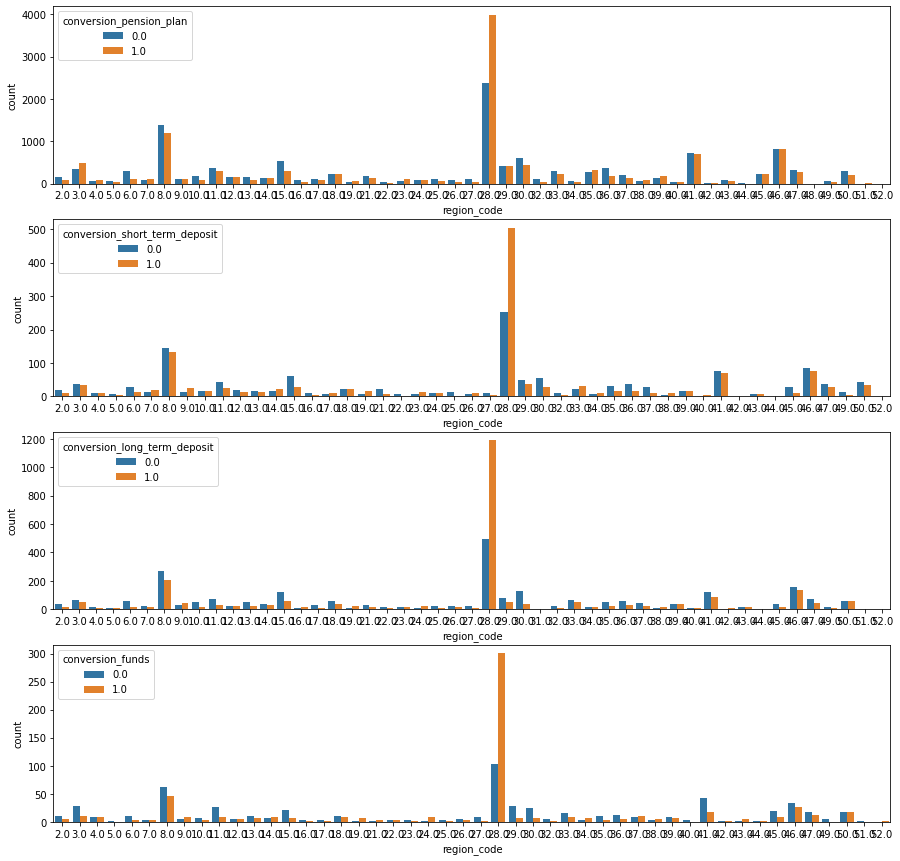

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 15))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x='region_code', hue=df.columns[-1], ax=axs[i])
plt.show()

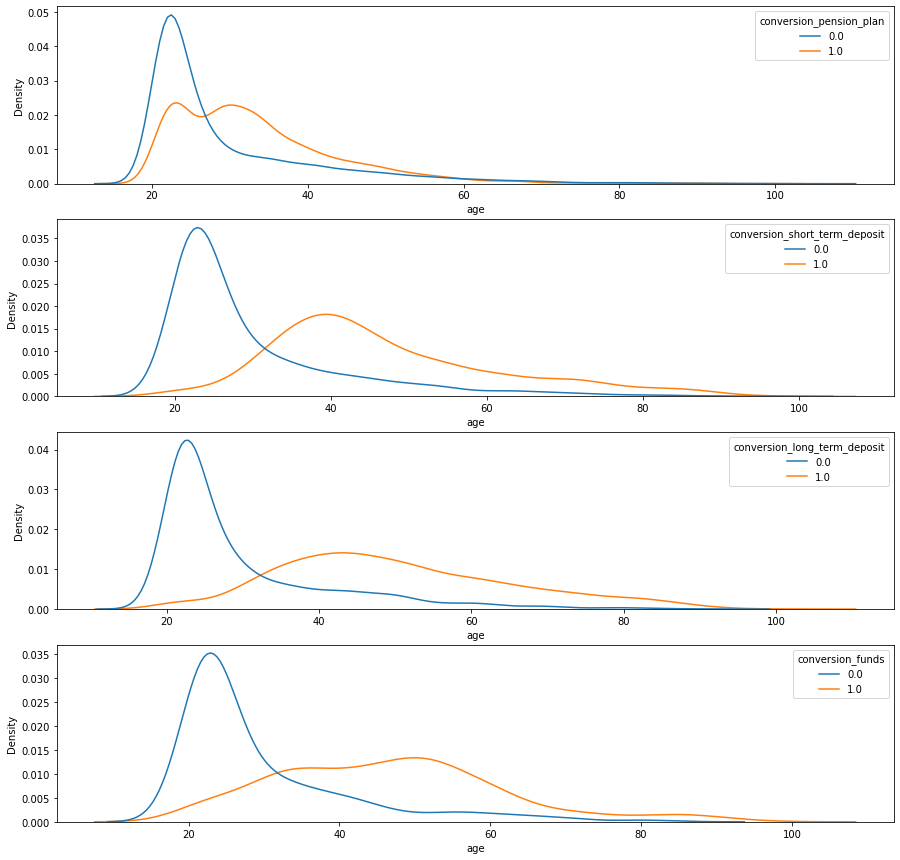

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 15))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.kdeplot(data=df, x='age', hue=df.columns[-1], ax=axs[i])
plt.show()

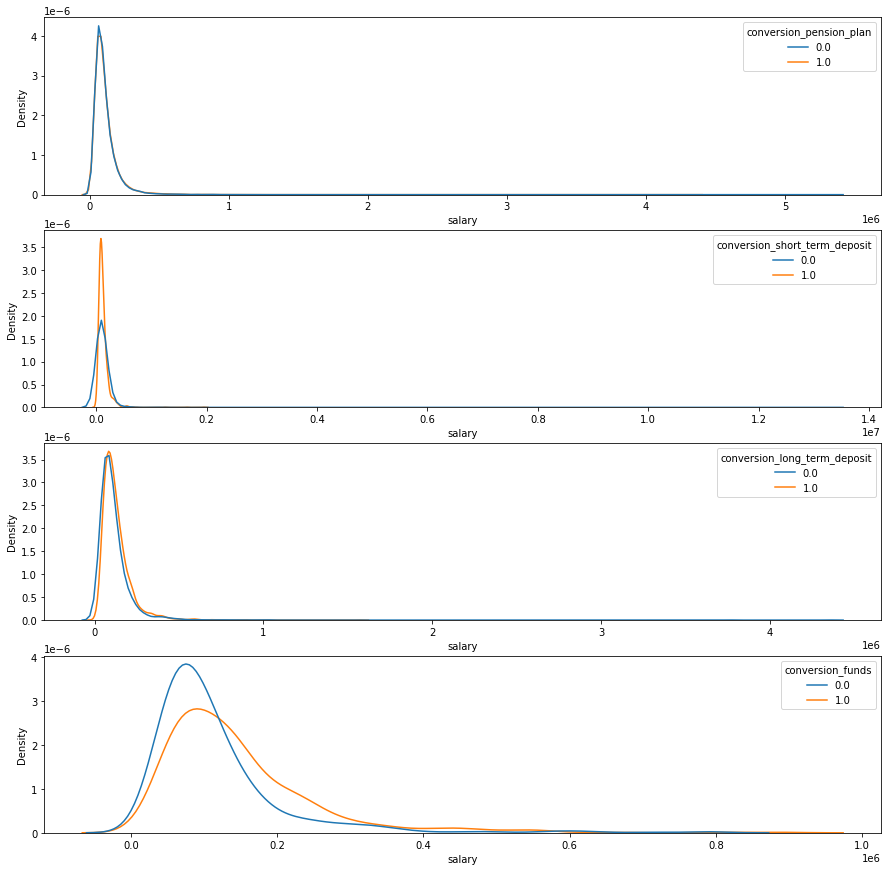

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 15))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.kdeplot(data=df, x='salary', hue=df.columns[-1], ax=axs[i])
plt.show()

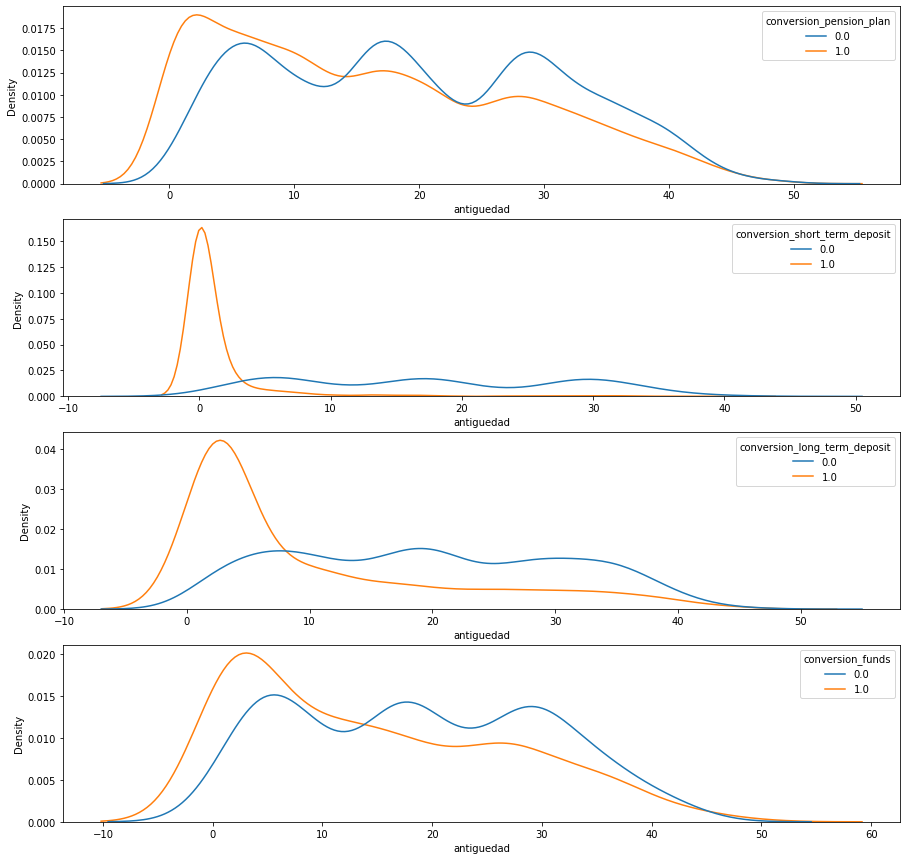

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 15))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.kdeplot(data=df, x='antiguedad', hue=df.columns[-1], ax=axs[i])
plt.show()

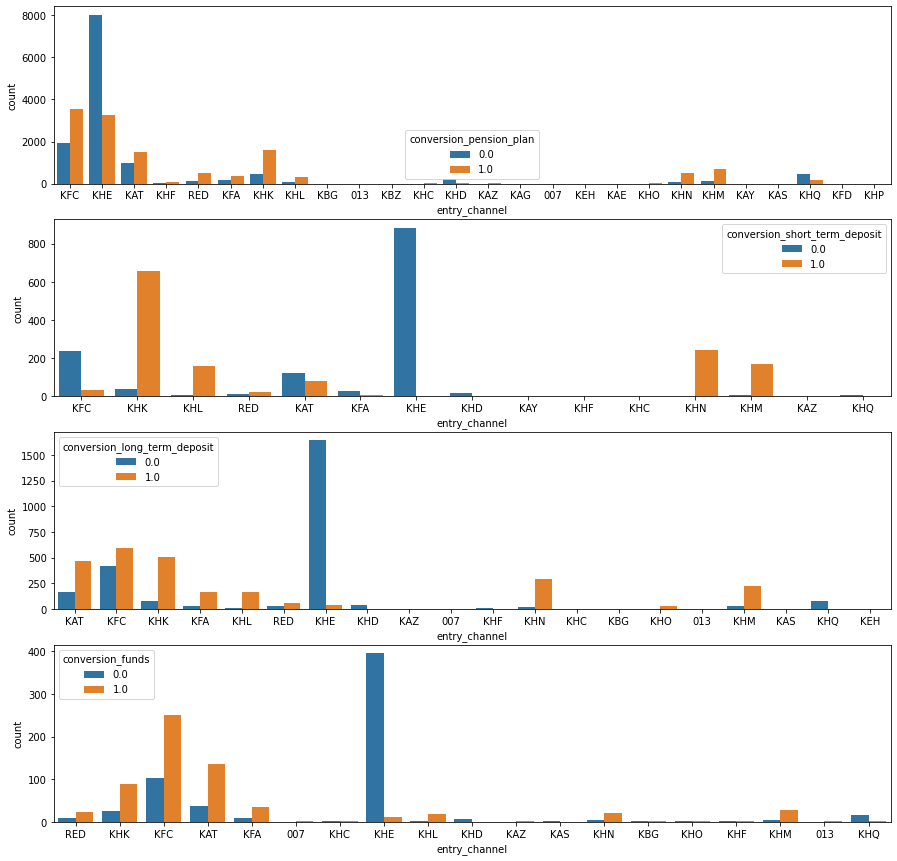

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 15))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x='entry_channel', hue=df.columns[-1], ax=axs[i])
plt.show()

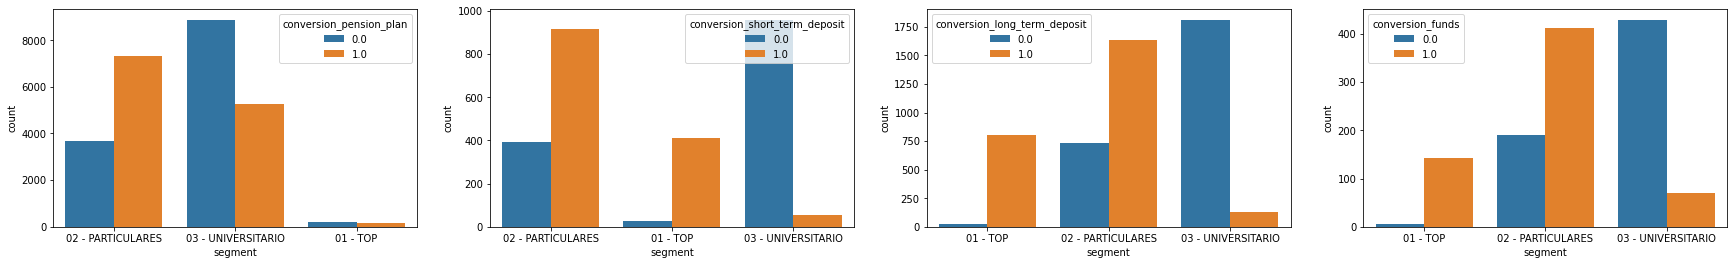

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=False, figsize=(30, 4))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x='segment', hue=df.columns[-1], ax=axs[i])
plt.show()

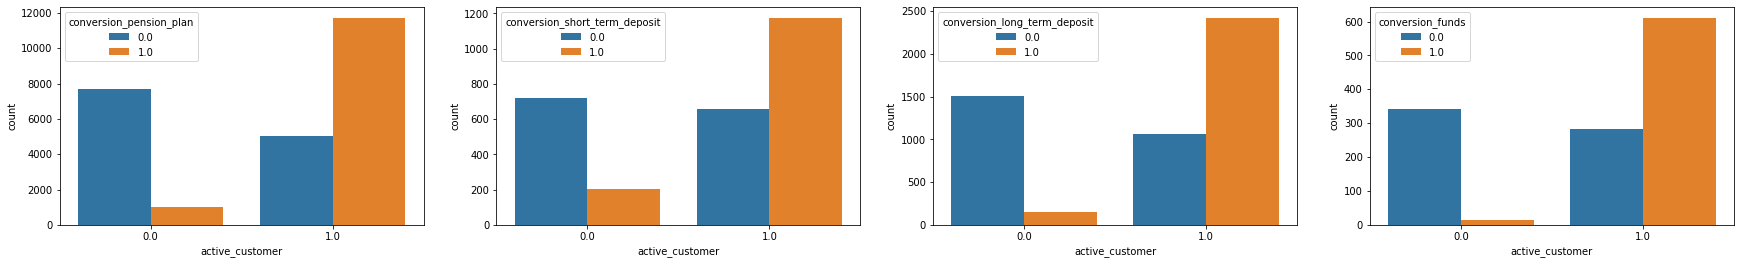

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=False, figsize=(30, 4))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x='active_customer', hue=df.columns[-1], ax=axs[i])
plt.show()

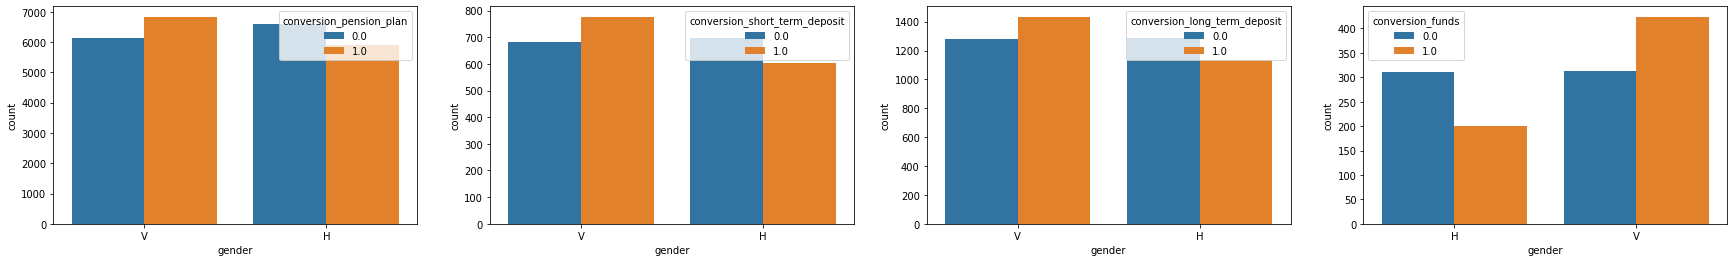

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=False, figsize=(30, 4))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x='gender', hue=df.columns[-1], ax=axs[i])
plt.show()

- pension_plan: alguna región parece tener significativamente más conversiones. La edad parece importante: 23 para no conversiones, 30 para conversiones. Una menor antigüedad, el hecho de ser un particular y ser cliente activo parecen tener un impacto muy positivo en las conversiones.</br>
- short_term: alguna región parece tener significativamente más conversiones. La edad parece importante: 23 para no conversiones, 40 para conversiones. Una antigüedad casí nula, algunos canales de entrada, el hecho de ser un particular y ser cliente activo parecen tener un impacto muy positivo en las conversiones. Si es cliente top, es casí seguro que consuma el producto.</br>
- long_term: alguna región parece tener significativamente más conversiones. La edad parece importante: 23 para no conversiones, 43 para conversiones. Una baja antigüedad, algunos canales de entrada, el hecho de ser un particular o cliente top parecen tener un impacto muy positivo en las conversiones. Si no es un cliente activo, es muy dificíl que consuma el producto. Si es cliente top, es casí seguro que consuma el producto.</br>
- fondo inversión: alguna región parece tener significativamente más conversiones. La edad parece importante: 23 para no conversiones, 50 para conversiones. Una antigüedad más baja, un salario algo superior en algunos canales de entrada y el hecho de ser un particular o cliente top parecen tener un impacto muy positivo en las conversiones.Si no es un cliente activo, es casí imposible que consuma el producto. Si es cliente top, es casí seguro que consuma el producto.</br>

#### análisis del target

In [ ]:
targets = []
for df in dfs_total:
  targets.append(df.columns[-1])

In [ ]:
targets

['conversion_pension_plan',
 'conversion_short_term_deposit',
 'conversion_long_term_deposit',
 'conversion_funds']

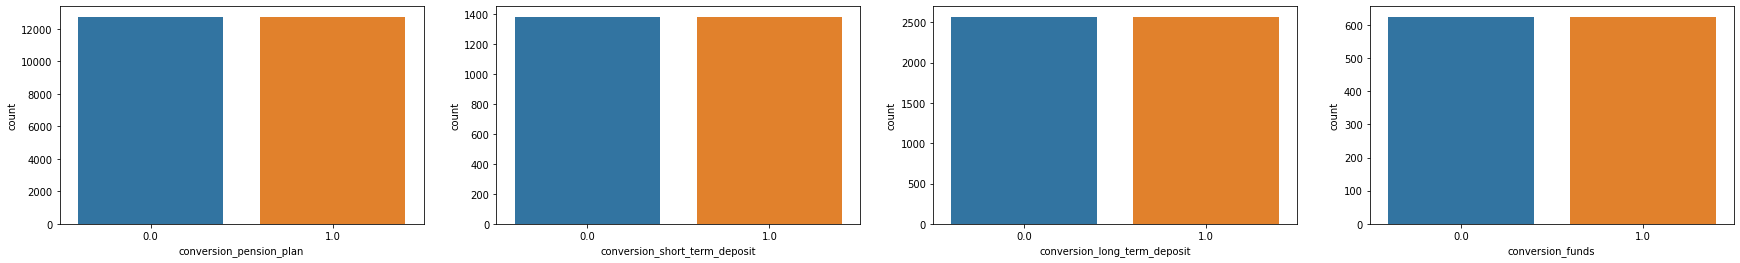

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, sharey=False, figsize=(30, 4))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(dfs_total):
  sns.countplot(data=df, x=df[targets[i]], ax=axs[i])
plt.show()

La relación entre conversiones y no conversiones esta equilibrada al 50% para cada producto. Es así como se han contruido los datasets.

#### análisis de las correlaciones

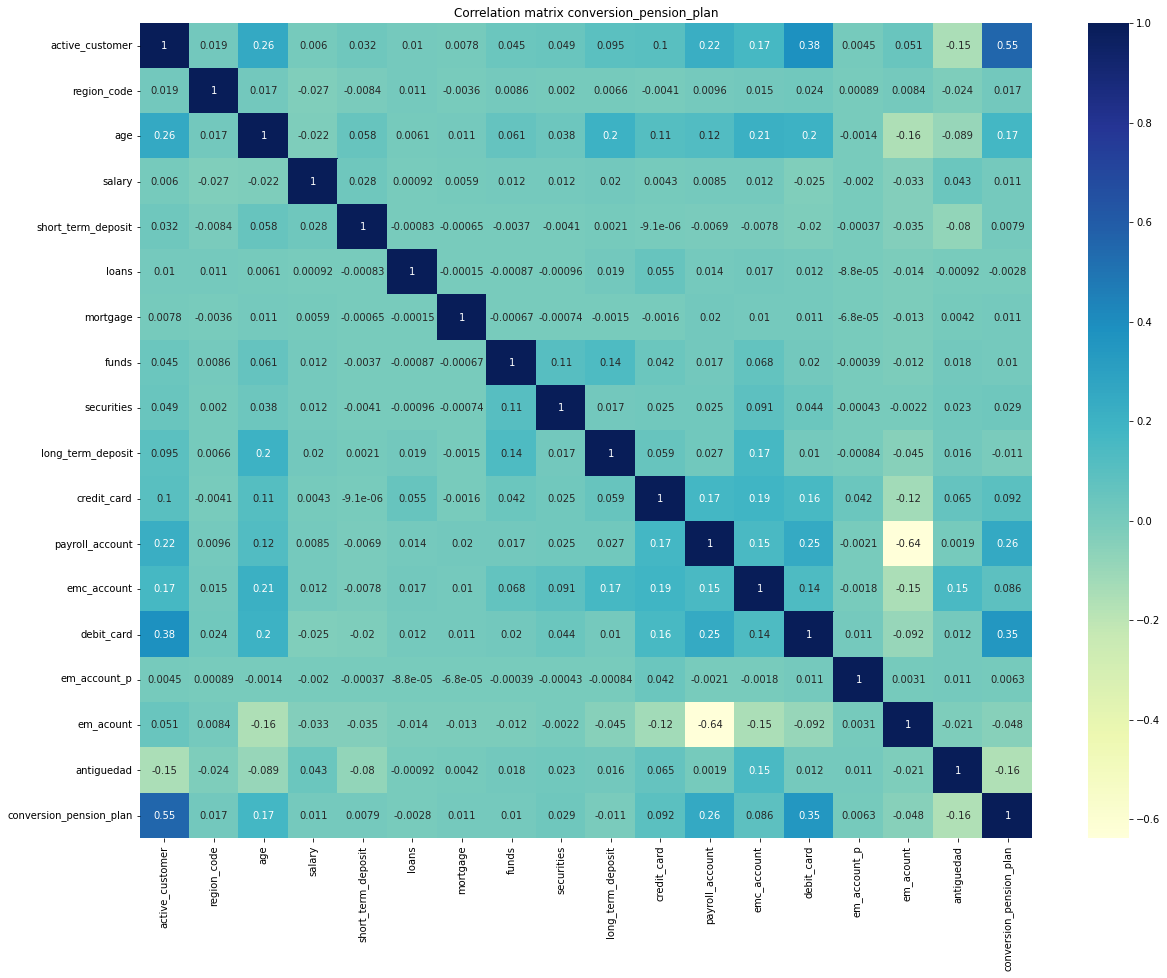

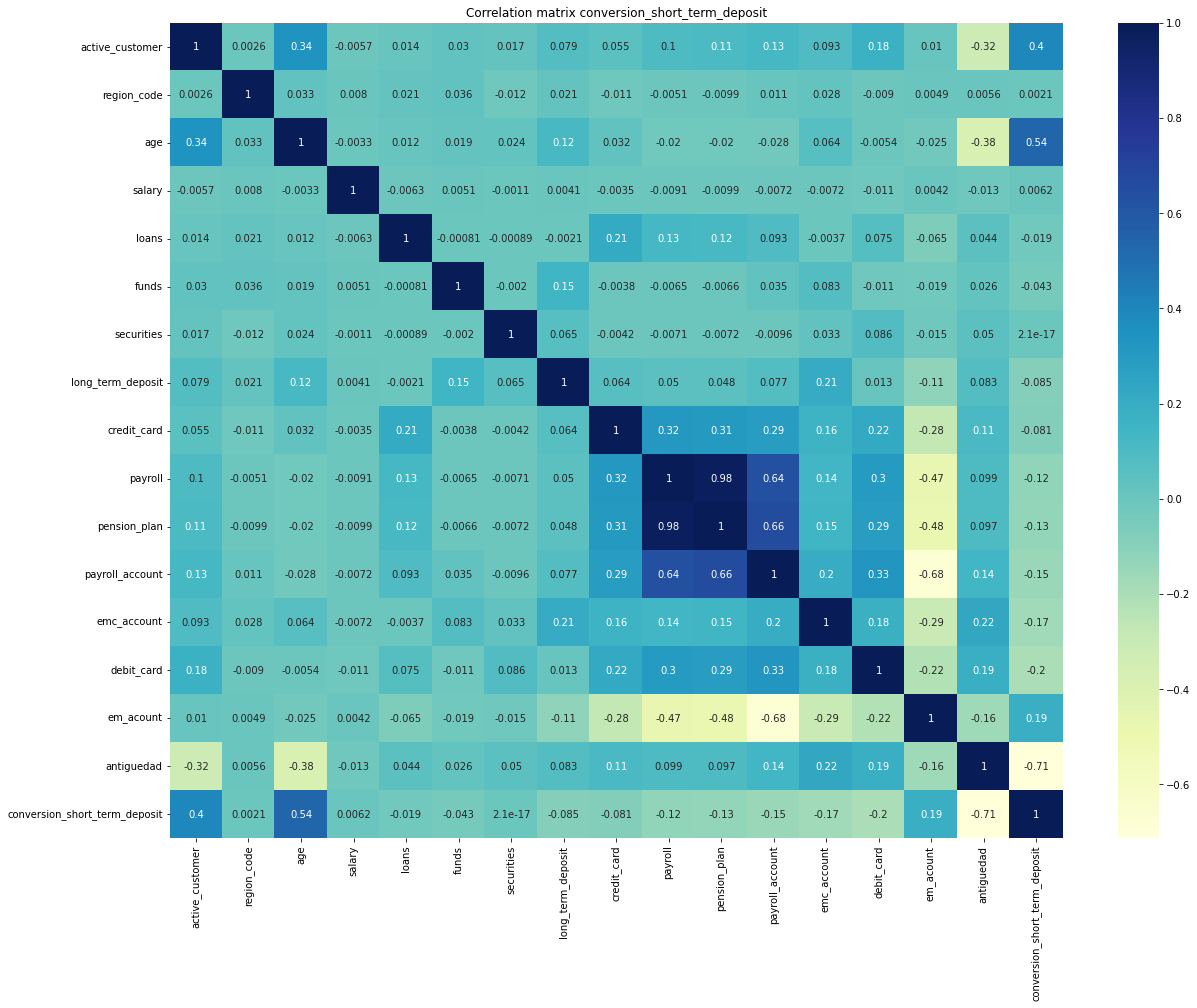

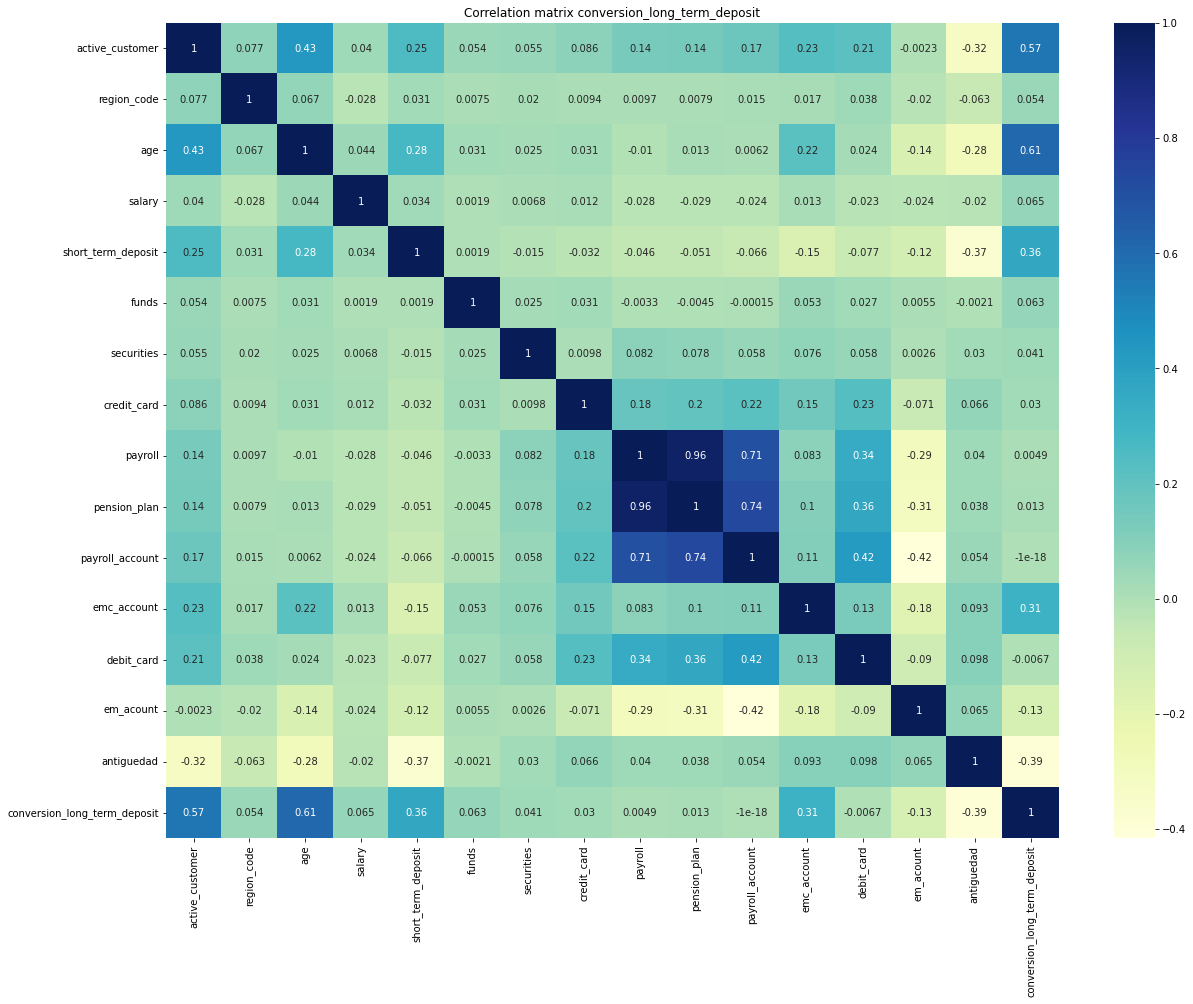

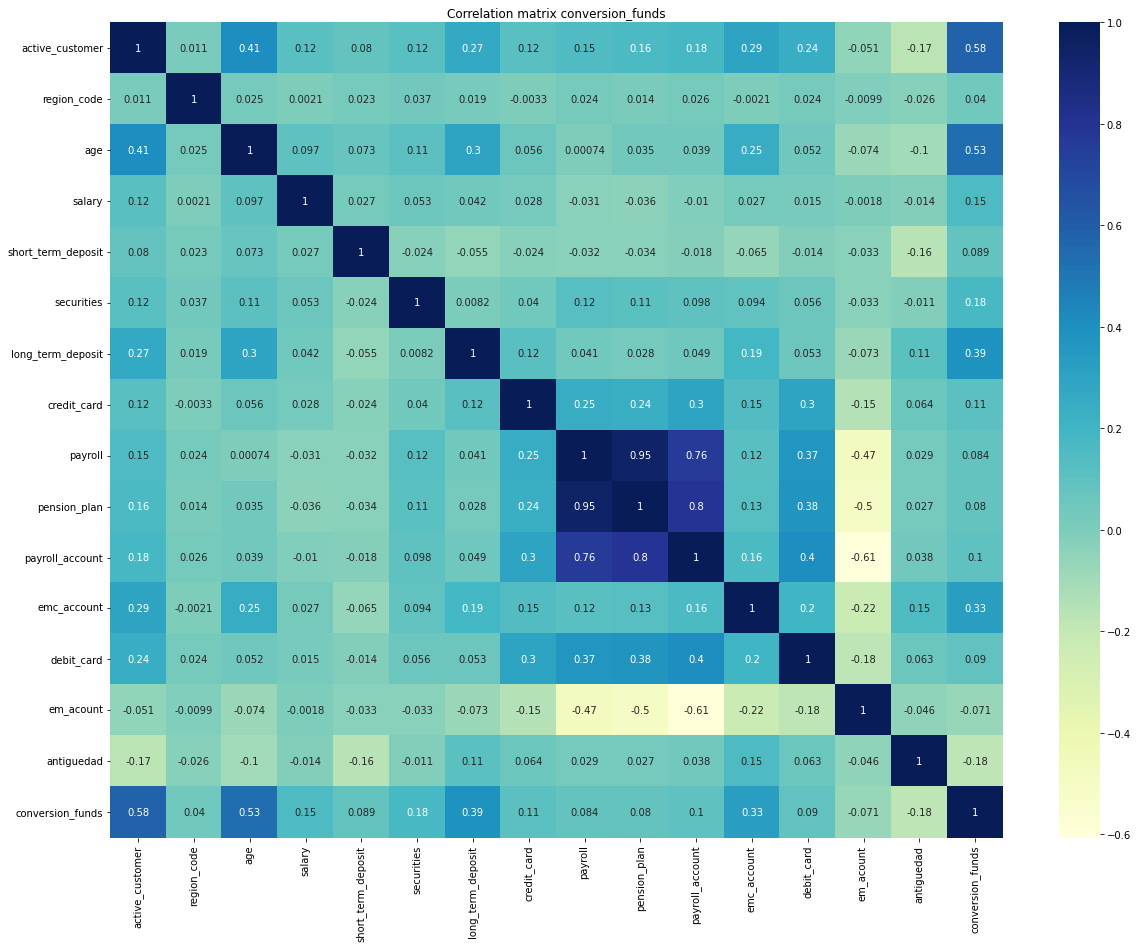

In [ ]:
for df in dfs_total:
  plt.rcParams['figure.figsize'] = 20, 15
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu").set_title(('Correlation matrix {}'.format(df.columns[-1])))
  plt.show()

In [ ]:
# pension_plan y payroll son demasiado correlacionadas en todos los df (menos en el df_total_pension_plan donde payroll no esta)
# analiza cual de las 2 variables esta menos relacionada con el target para eliminarla
for i, df in enumerate(dfs_total):
  if i != 0:
    print('df', df.columns[-1])
    print('corr pension_plan-target:', df['pension_plan'].corr(df[targets[i]]))
    print('corr payroll-target:', df['payroll'].corr(df[targets[i]]))
    print('-'*40)

df conversion_short_term_deposit
corr pension_plan-target: -0.12663093294393096
corr payroll-target: -0.12225121580049912
----------------------------------------
df conversion_long_term_deposit
corr pension_plan-target: 0.013287541594985387
corr payroll-target: 0.004926261392232704
----------------------------------------
df conversion_funds
corr pension_plan-target: 0.08039665870711535
corr payroll-target: 0.08428695623736238
----------------------------------------


In [ ]:
# en todos los casos, la variable menos relacionada es payroll, menos para fondo de inversión donde es pension_plan.
# elimina las variables
df_total_short_term.drop('payroll', axis=1, inplace=True)
df_total_long_term.drop('payroll', axis=1, inplace=True)
df_total_fondo_inv.drop('pension_plan', axis=1, inplace=True)

Para todos los productos, la edad y si es cliente es activo parece tener una correlación positiva media (entorno al 0.5), mientras que la antigüedad tiene una correlación negativa sobre la propensión a compra. La tenencia de algunos productos tiene alguna correlación media.

#### gestión de la variable region_code

Después de analizar los modelos y retrabajar el preprocessing, decidí conservar la variable region_code para los productos pension_plan, long_term y fondo de inversión y quitarla para short_term. </br>
VER APARTADO RETRABAJAR PREPROCESSING

In [ ]:
# elimina region_code para short_term
df_total_short_term.drop('region_code', axis=1, inplace=True)

In [ ]:
# para los productos que conservan la variable region_code, le cambia el tipo a categorico para poder hacer el one hot encoding
df_total_pension_plan['region_code']  = df_total_pension_plan['region_code'].astype('category')
df_total_long_term['region_code']  = df_total_long_term['region_code'].astype('category')
df_total_fondo_inv['region_code']  = df_total_fondo_inv['region_code'].astype('category')

#### one hot encoding

In [ ]:
df_total_pension_plan = pd.get_dummies(df_total_pension_plan)
df_total_short_term = pd.get_dummies(df_total_short_term)
df_total_long_term = pd.get_dummies(df_total_long_term)
df_total_fondo_inv = pd.get_dummies(df_total_fondo_inv)

In [ ]:
# vuelve a poner los df en la lista ya que no se actualizaron los cambios en la lista
dfs_total = [df_total_pension_plan, df_total_short_term, df_total_long_term, df_total_fondo_inv]

In [ ]:
# elimina una de las columnas creadas de la variable categorica convertible a booleana 'gender'
for df in dfs_total:
  df.drop(['gender_V'], axis=1, inplace=True)

#### elimina las variables con baja varianza

In [ ]:
#Elimina columnas donde el 99% de los valores son iguales
for i, df in enumerate(dfs_total):
  vt = VarianceThreshold(threshold = 0.01) 
  vt.fit(df)

  cols_lowvar = df.columns[vt.get_support()==False]
  df.drop(columns=cols_lowvar,inplace=True)

  print('df {}'.format(targets[i]))
  print(len(cols_lowvar),'columnas con baja varianza eliminadas:\n', cols_lowvar)
  print('-'*40)

df conversion_pension_plan
46 columnas con baja varianza eliminadas:
 Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'em_account_p', 'entry_channel_007', 'entry_channel_013',
       'entry_channel_KAE', 'entry_channel_KAG', 'entry_channel_KAS',
       'entry_channel_KAY', 'entry_channel_KAZ', 'entry_channel_KBG',
       'entry_channel_KBZ', 'entry_channel_KEH', 'entry_channel_KFD',
       'entry_channel_KHC', 'entry_channel_KHF', 'entry_channel_KHO',
       'entry_channel_KHP', 'region_code_4.0', 'region_code_5.0',
       'region_code_7.0', 'region_code_9.0', 'region_code_13.0',
       'region_code_16.0', 'region_code_17.0', 'region_code_19.0',
       'region_code_22.0', 'region_code_23.0', 'region_code_24.0',
       'region_code_25.0', 'region_code_26.0', 'region_code_27.0',
       'region_code_32.0', 'region_code_34.0', 'region_code_38.0',
       'region_code_40.0', 'region_code_42.0', 'region_code_43.0',
       'region_code_44.0', 'region_code_48.0',

#### feature importance

In [ ]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

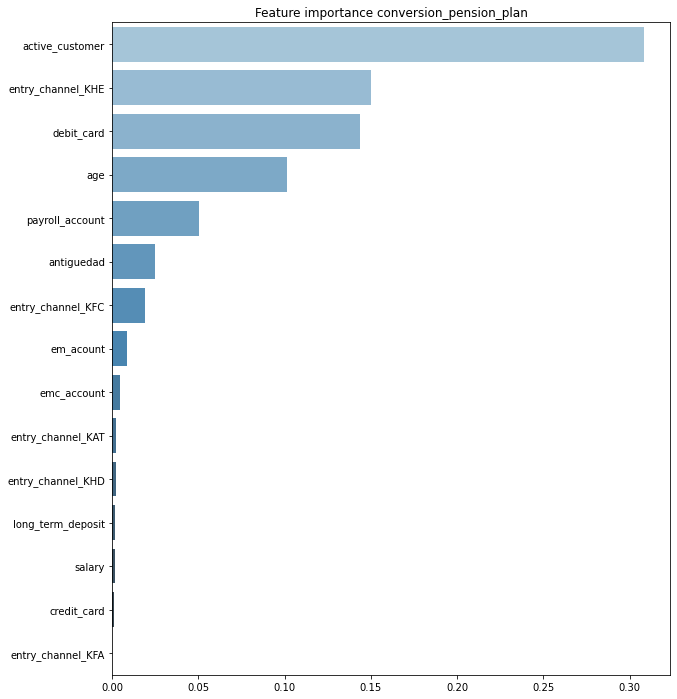

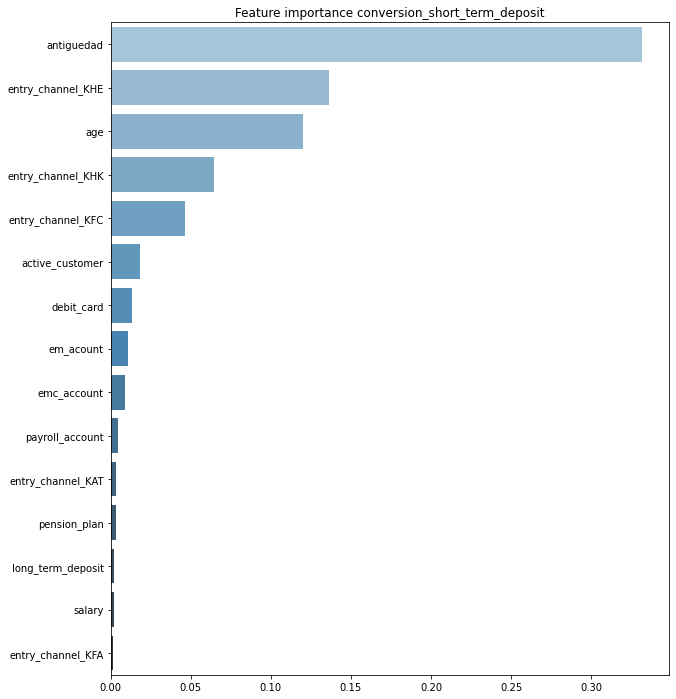

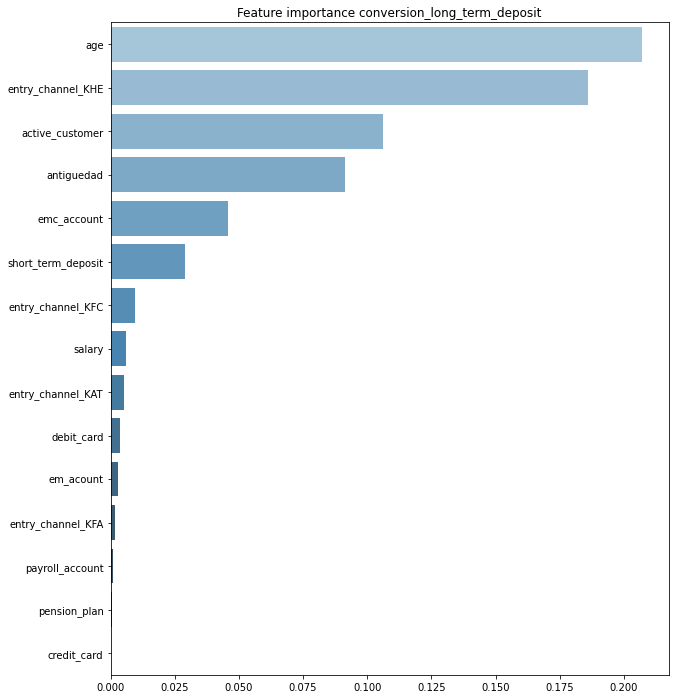

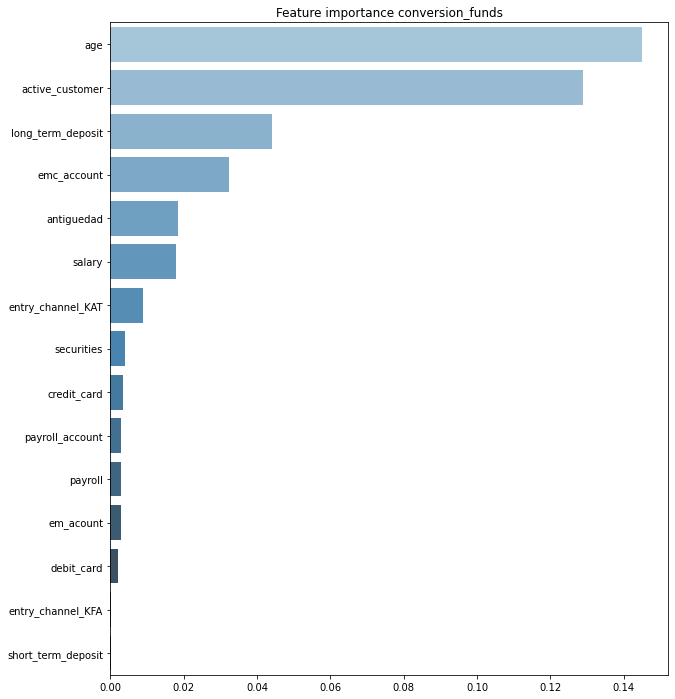

In [ ]:
# entrena un random forest para ver la importancia de cada variable en los módelos
for i, df in enumerate(dfs_total):
  x, y = df.drop(targets[i],axis=1), df[targets[i]]
  # entrena un RandomForest Classifier
  clf = RandomForestClassifier(**params)
  clf = clf.fit(x, y)
  # Plotea las 15 mejores Features importances
  features = clf.feature_importances_[:15]
  columnas = x.columns[:15]
  imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)
  plt.figure(figsize=(10,12))
  plt.title("Feature importance {}".format(targets[i]))
  ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
  plt.show()

La feature importance esta en linea con lo que pudimos ver con los countplots, kdeplots y correlaciones.

### Split train/test


In [ ]:
# imprime los shapes
for i, df in enumerate(dfs_total):
  print('shape df {}'.format(targets[i]), df.shape)

shape df conversion_pension_plan (25489, 50)
shape df conversion_short_term_deposit (2760, 24)
shape df conversion_long_term_deposit (5138, 49)
shape df conversion_funds (1248, 52)


Para pension_plan dejaremos un 30% para el test al tener más items.
Para long_term dejaremos un 20% al tener solo 5.000 items.
Para short_term y para fondo de inversión dejaremos solo 15% al tener tan pocos datos.

In [ ]:
# pension_plan 70% train 30% test
y_pension_plan = df_total_pension_plan[targets[0]]
X_pension_plan = df_total_pension_plan.drop(targets[0], axis=1)

X_pension_plan_train, X_pension_plan_test, y_pension_plan_train, y_pension_plan_test = train_test_split(X_pension_plan, y_pension_plan, test_size=0.3, random_state=42)

# short_term 85% train 15% test
y_short_term = df_total_short_term[targets[1]]
X_short_term = df_total_short_term.drop(targets[1], axis=1)

X_short_term_train, X_short_term_test, y_short_term_train, y_short_term_test = train_test_split(X_short_term, y_short_term, test_size=0.15, random_state=42)

# long_term 80% train 20% test
y_long_term = df_total_long_term[targets[2]]
X_long_term = df_total_long_term.drop(targets[2], axis=1)

X_long_term_train, X_long_term_test, y_long_term_train, y_long_term_test = train_test_split(X_long_term, y_long_term, test_size=0.2, random_state=42)

# fondo inversión 85% train 15% test
y_fondo_inv = df_total_fondo_inv[targets[3]]
X_fondo_inv = df_total_fondo_inv.drop(targets[3], axis=1)

X_fondo_inv_train, X_fondo_inv_test, y_fondo_inv_train, y_fondo_inv_test = train_test_split(X_fondo_inv, y_fondo_inv, test_size=0.15, random_state=42)

### Estandarización

In [ ]:
# pension_plan
scaler_pension_plan = StandardScaler()
X_pension_plan_train = scaler_pension_plan.fit_transform(X_pension_plan_train)  # estandariza y define la regla de estandarización
X_pension_plan_test = scaler_pension_plan.transform(X_pension_plan_test)        # estandariza según la regla definida con el X_train

# short_term
scaler_short_term = StandardScaler()
X_short_term_train = scaler_short_term.fit_transform(X_short_term_train)   
X_short_term_test = scaler_short_term.transform(X_short_term_test)

# long_term
scaler_long_term = StandardScaler()
X_long_term_train = scaler_long_term.fit_transform(X_long_term_train)   
X_long_term_test = scaler_long_term.transform(X_long_term_test)

# fondo inversión
scaler_fondo_inv = StandardScaler()
X_fondo_inv_train = scaler_fondo_inv.fit_transform(X_fondo_inv_train)   
X_fondo_inv_test = scaler_fondo_inv.transform(X_fondo_inv_test)

## Modelado

### Train + evaluación AUC

In [ ]:
def medicion(y_t, y_p):
  """imprime la curva ROC y el AUC"""

  # calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y_t, y_p)
  roc_auc = metrics.auc(fpr, tpr)

  # method I: plt
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 6))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  return roc_auc

In [ ]:
def entrenar(Xtrain, Xtest, ytrain, ytest):
  """entrena 6 módelos.
      imprime la curva roc de cada módelo junto al valor AUC
      devuelve un dataframe con los valores de AUC redondeados a 5 decimales para cada módelo"""

  # creamos la lista de auc vacía
  lista_aucs = []

  # Support Vector Machine
  print('Support Vector Machine')
  svclassifier = SVC(max_iter=20)

  svclassifier.fit(Xtrain, ytrain)
  y_pred = svclassifier.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('SVC', round(roc_auc, 5)))
  print('*'*80)

  # Regresión logística
  print('Regresión logística')
  lr = LogisticRegression(max_iter=40)

  lr.fit(Xtrain, ytrain)
  y_pred = lr.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('regresión logística', round(roc_auc, 5)))
  print('*'*80)

  # Decision tree classsifier
  print('Decision tree classsifier')
  dt_base = DecisionTreeClassifier(random_state=42)

  dt_base.fit(Xtrain, ytrain)
  y_pred = dt_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('decision tree classifier', round(roc_auc, 5)))
  print('*'*80)

  # Random forest
  print('Random forest')
  rf_base = RandomForestClassifier(random_state=42)

  rf_base.fit(Xtrain, ytrain)
  y_pred = rf_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('random forest', round(roc_auc, 5)))
  print('*'*80)

  # Gradient boosting
  print('Gradient boosting')
  gbc_base = GradientBoostingClassifier(random_state=42)

  gbc_base.fit(Xtrain, ytrain)
  y_pred = gbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('gradient boosting', round(roc_auc, 5)))
  print('*'*80)

  # XGBClassifier
  print('XGBClassifier')
  xgbc_base = xgb.XGBClassifier(random_state=42)

  xgbc_base.fit(Xtrain, ytrain)
  y_pred = xgbc_base.predict(Xtest)

  roc_auc = medicion(ytest, y_pred)
  lista_aucs.append(('XGB classifier', round(roc_auc, 5)))
  print('*'*80)

  df_aucs = pd.DataFrame(lista_aucs, columns=['modelos', 'AUC'])
  df_aucs = df_aucs.set_index('modelos')
  
  return df_aucs

#### pension_plan

Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


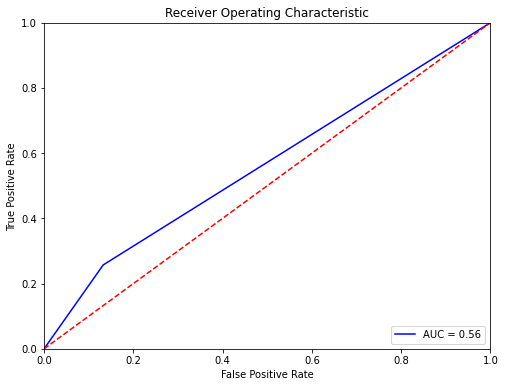

********************************************************************************
Regresión logística


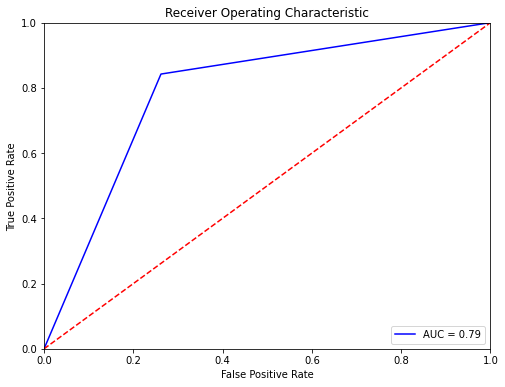

********************************************************************************
Decision tree classsifier


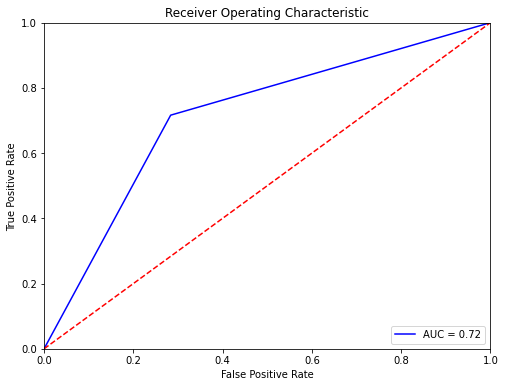

********************************************************************************
Random forest


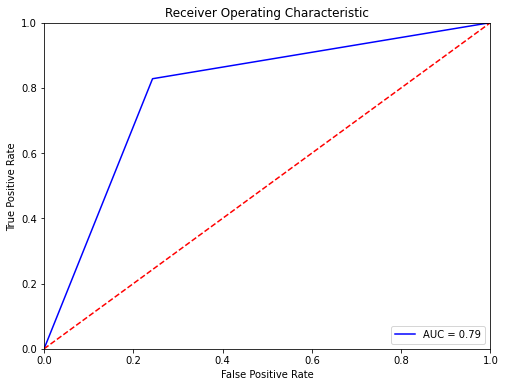

********************************************************************************
Gradient boosting


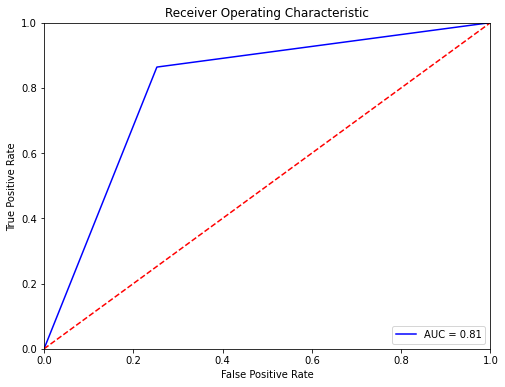

********************************************************************************
XGBClassifier


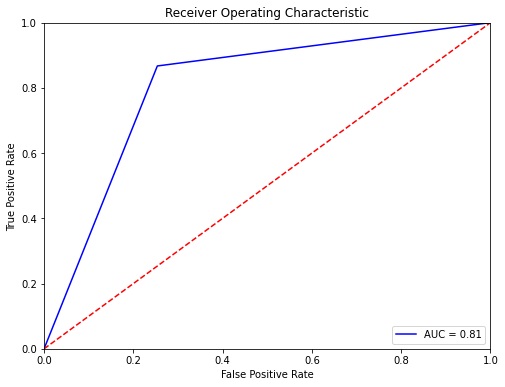

********************************************************************************


In [ ]:
aucs_pension_plan = entrenar(X_pension_plan_train, X_pension_plan_test, y_pension_plan_train, y_pension_plan_test)

In [ ]:
aucs_pension_plan

,AUC
modelos,
SVC,0.56234
regresión logística,0.79026
decision tree classifier,0.71636
random forest,0.79252
gradient boosting,0.80555
XGB classifier,0.80672


el mejor modelo para pension_plan es (por poco) XGBClassifier con un AUC de 0.80672

#### short_term

Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


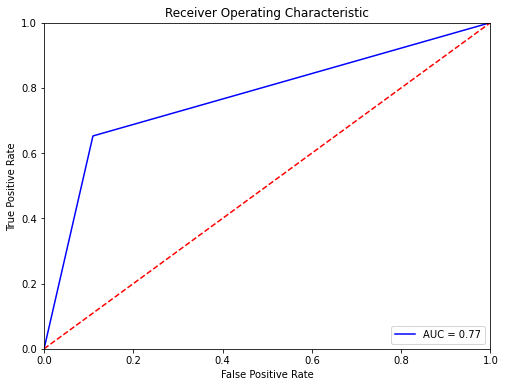

********************************************************************************
Regresión logística


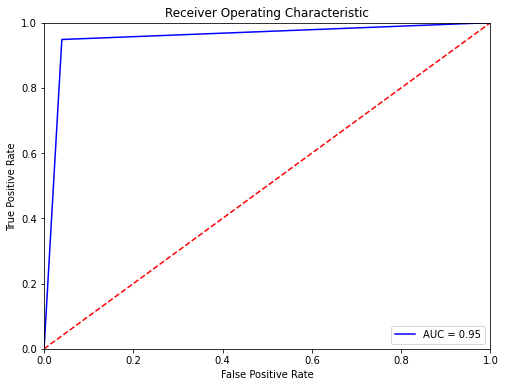

********************************************************************************
Decision tree classsifier


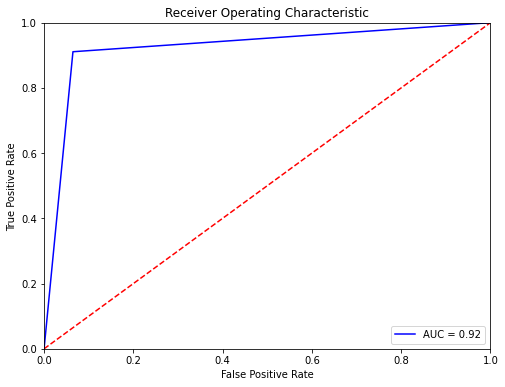

********************************************************************************
Random forest


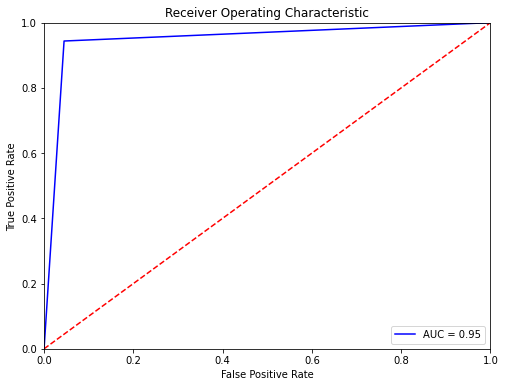

********************************************************************************
Gradient boosting


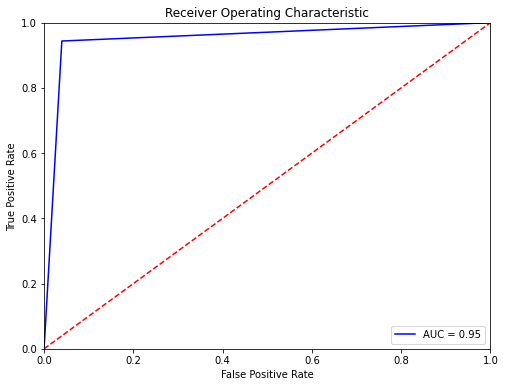

********************************************************************************
XGBClassifier


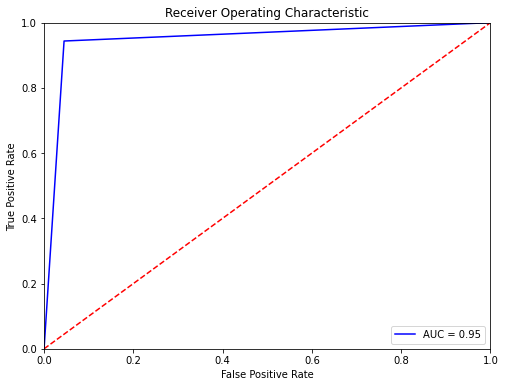

********************************************************************************


In [ ]:
aucs_short_term = entrenar(X_short_term_train, X_short_term_test, y_short_term_train, y_short_term_test)

In [ ]:
aucs_short_term

,AUC
modelos,
SVC,0.77156
regresión logística,0.95428
decision tree classifier,0.92306
random forest,0.94944
gradient boosting,0.95193
XGB classifier,0.94944


El mejor modelo para short_term es regresión logística con un increíble AUC de 0.95428

#### long_term

Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


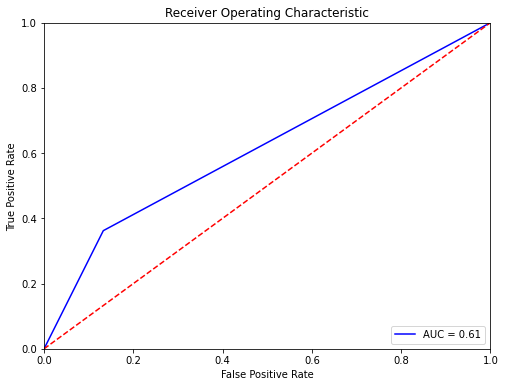

********************************************************************************
Regresión logística


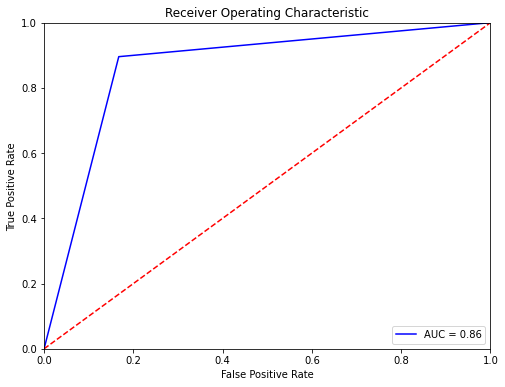

********************************************************************************
Decision tree classsifier


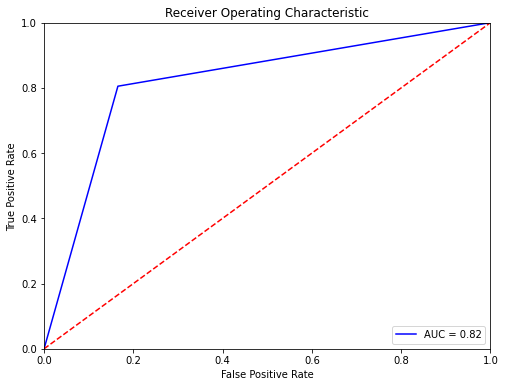

********************************************************************************
Random forest


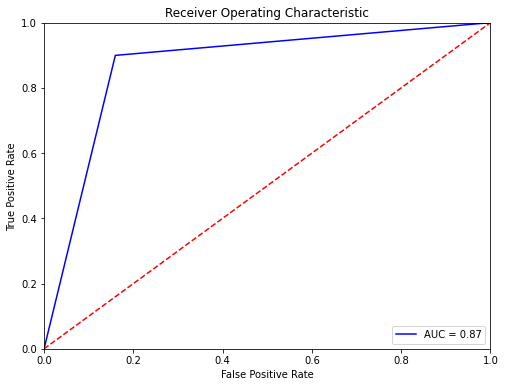

********************************************************************************
Gradient boosting


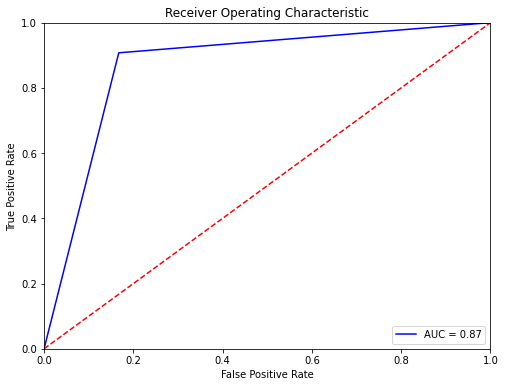

********************************************************************************
XGBClassifier


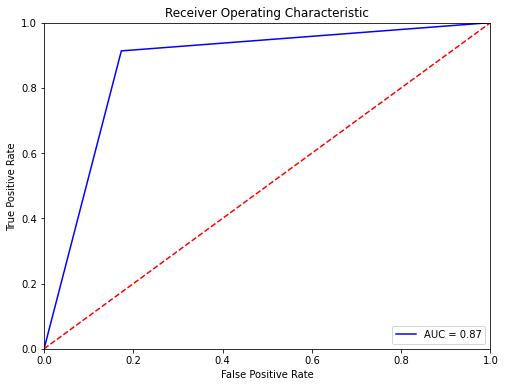

********************************************************************************


In [ ]:
aucs_long_term = entrenar(X_long_term_train, X_long_term_test, y_long_term_train, y_long_term_test)

In [ ]:
aucs_long_term

,AUC
modelos,
SVC,0.61476
regresión logística,0.86418
decision tree classifier,0.81987
random forest,0.87000
gradient boosting,0.87009
XGB classifier,0.87015


Después de un lindo empate a 3 decimales, el mejor modelo para long_term es XGBClassifier con un buen AUC de 0.87015

#### fondo inversión

Support Vector Machine


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


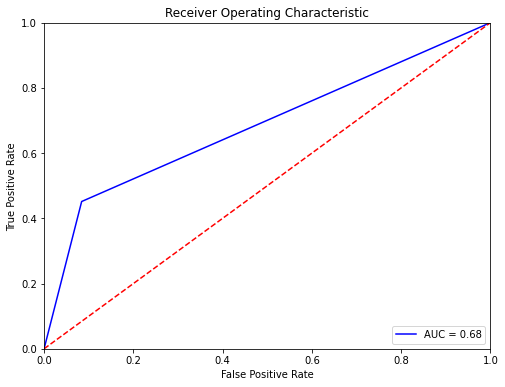

********************************************************************************
Regresión logística


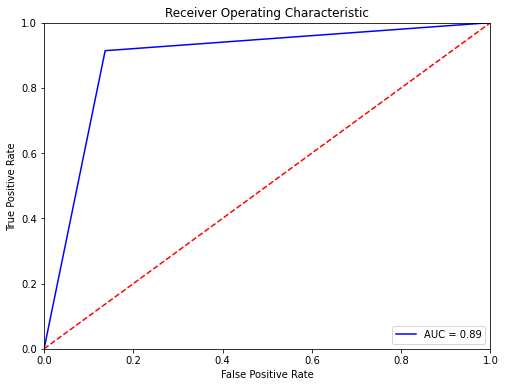

********************************************************************************
Decision tree classsifier


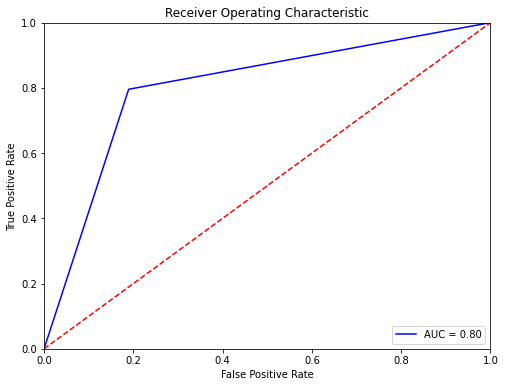

********************************************************************************
Random forest


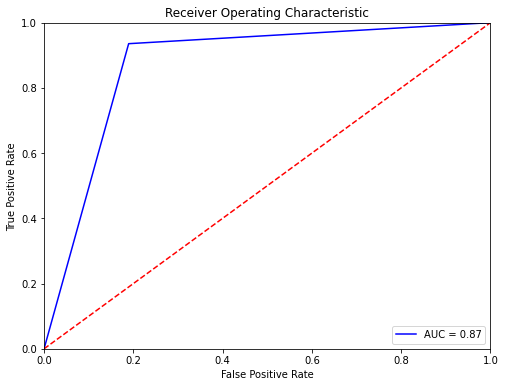

********************************************************************************
Gradient boosting


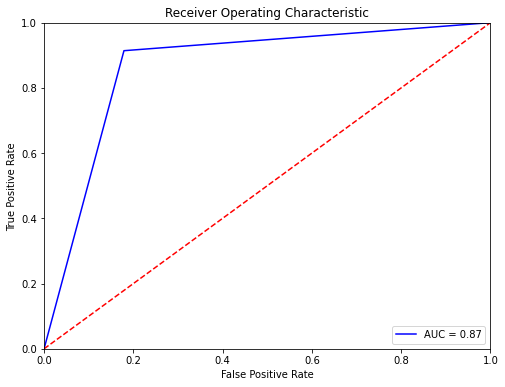

********************************************************************************
XGBClassifier


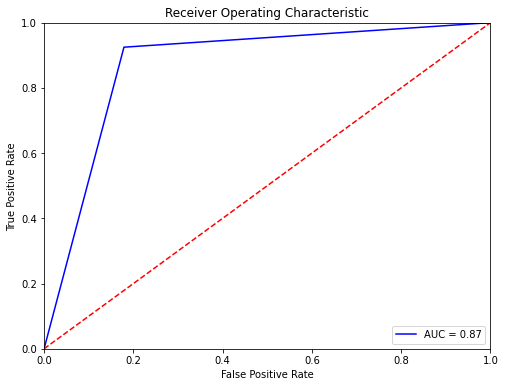

********************************************************************************


In [ ]:
aucs_fondo_inv = entrenar(X_fondo_inv_train, X_fondo_inv_test, y_fondo_inv_train, y_fondo_inv_test)

In [ ]:
aucs_fondo_inv

,AUC
modelos,
SVC,0.68370
regresión logística,0.88857
decision tree classifier,0.80311
random forest,0.87301
gradient boosting,0.86752
XGB classifier,0.87289


El mejor modelo para fondo inversión es regresión logística con un buen AUC de 0.88857

### mejora del modelo

#### retrabajar el preprocessing

Barajé la posibilidad de quitar la variable region_code. </br>
Para ello, comparé los modelos sin la variable region_code o dejandola.</br> 1º SIN region_code, 2º CON region_code:
- pension_plan: 0.8016 vs 0.8067
- short_term: 0.9542 vs 0.9541
- long_term: 0.8672 vs 0.8701
- fondo inversión: 0.8730 vs 0.8886 </br></br>
Parece que no aporta valor en short_term, sin tampoco afectar casí nada al modelo. Decido eliminar la variable region_code para estos  modelos.</br>
Pero si que aporta valor en los otros productos: medio punto en pension_plan y long_term y punto y medio para fondo de inversión.</br>
Decido dejar la variable para estos 3 productos.

#### generar nuevas variables

Generé la nueva variable antigüedad para poder explotar el variable entry_date. He visto como es una de las variables (sino la que más) aporta al modelo de todos los prouctos.

#### probar otros modelos

He probado 6 modelos para todos los productos.


#### hiperparametrizar

pension_plan

In [ ]:
xgbc_pension_plan = xgb.XGBClassifier(random_state=42, n_estimators=300, learning_rate=0.05)

xgbc_pension_plan.fit(X_pension_plan_train, y_pension_plan_train)
y_pred_pension_plan = xgbc_pension_plan.predict(X_pension_plan_test)

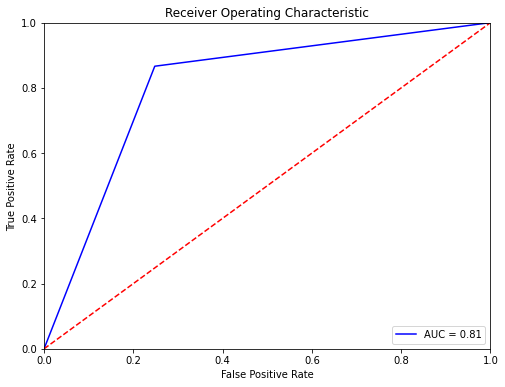

0.8092098818803919


In [ ]:
roc_auc_pension_plan = medicion(y_pension_plan_test, y_pred_pension_plan)
print(roc_auc_pension_plan)

Mejoró de 0.80672 a 0.80921

short_term

In [ ]:
lr_short_term = LogisticRegression(max_iter=40)

lr_short_term.fit(X_short_term_train, y_short_term_train)
y_pred_short_term = lr_short_term.predict(X_short_term_test)

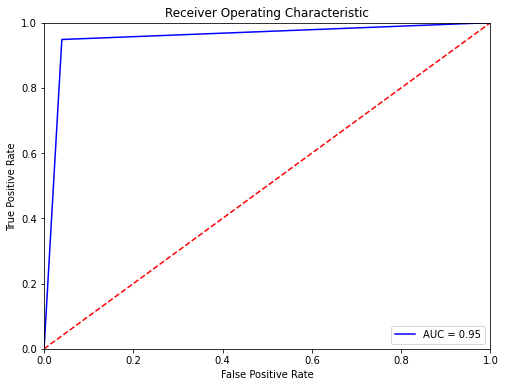

0.9542779062434307


In [ ]:
roc_auc_short_term = medicion(y_short_term_test, y_pred_short_term)
print(roc_auc_short_term)

No se ha podido mejorar el modelo hiperparametrizandolo. Se queda en 0.95428.

long_term

In [ ]:
xgbc_long_term = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.12)

xgbc_long_term.fit(X_long_term_train, y_long_term_train)
y_pred_long_term = xgbc_long_term.predict(X_long_term_test)

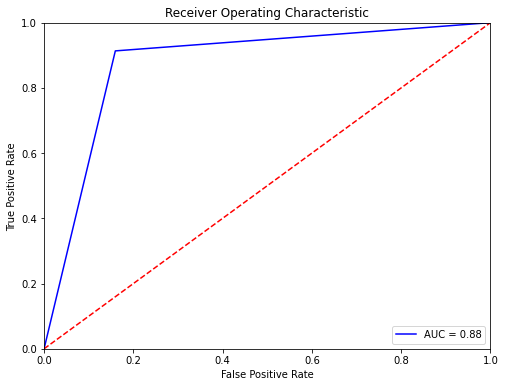

0.8768852210781346


In [ ]:
roc_auc_long_term = medicion(y_long_term_test, y_pred_long_term)
print(roc_auc_long_term)

Se ha mejorado de 0.87015 a 0.87689

fondo inversión

In [ ]:
lr_fondo_inv = LogisticRegression(max_iter=40)

lr_fondo_inv.fit(X_fondo_inv_train, y_fondo_inv_train)
y_pred_fondo_inv = lr_fondo_inv.predict(X_fondo_inv_test)

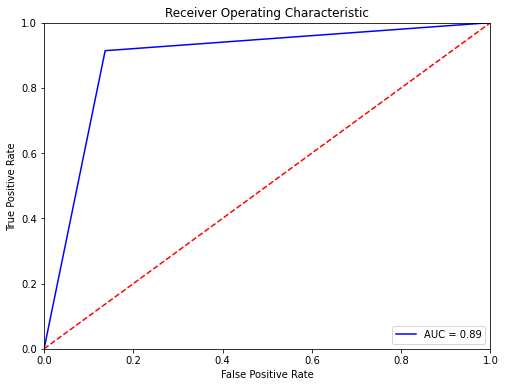

0.8885681946802491


In [ ]:
roc_auc_fondo_inv = medicion(y_fondo_inv_test, y_pred_fondo_inv)
print(roc_auc_fondo_inv)

Con los parametros por default el modelo es optimo a 0.88857

### Guardar modelo

In [ ]:
# guarda los modelos definitivos en un diccionario
modelos = {
    'pension_plan': xgbc_pension_plan, 
    'short_term': lr_short_term, 
    'long_term': xgbc_long_term, 
    'fondo inversion': lr_fondo_inv}

In [ ]:
modelos

{'pension_plan': XGBClassifier(learning_rate=0.05, n_estimators=300, random_state=42),
 'short_term': LogisticRegression(max_iter=40),
 'long_term': XGBClassifier(learning_rate=0.12, random_state=42),
 'fondo inversion': LogisticRegression(max_iter=40)}

# clasificación Predict

El objetivo es entregar una propensión a la compra de los 5 productos para los clientes de la última partición, ordenados de más propensos a menos propensos. </br>
Para cada producto eliminé los clientes que ya tienen el producto. </br>
Realizaré en el dataset los mismo cambios realizados en el data set de entrenamiento: borrar las mismas columnas, one hot encoding, estandarización...


## Preparación de los datos

### Preprocessing

recupero el data set de atributos entero con preprocessing hecho: df_atributos

In [ ]:
df_atributos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385379 entries, 0 to 5639909
Data columns (total 24 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_channel       object        
 3   active_customer     float64       
 4   segment             object        
 5   region_code         float64       
 6   gender              object        
 7   age                 int64         
 8   salary              float64       
 9   short_term_deposit  int64         
 10  loans               int64         
 11  mortgage            int64         
 12  funds               int64         
 13  securities          int64         
 14  long_term_deposit   int64         
 15  credit_card         int64         
 16  payroll             float64       
 17  pension_plan        float64       
 18  payroll_account     int64         
 19  emc_account         int64         
 20  de

filtra por la última partición


In [ ]:
df_atributos['pk_partition'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
df_pred = df_atributos[df_atributos['pk_partition'] == '2019-05-01T00:00:00.000000000']

In [ ]:
df_pred

,pk_cid,pk_partition,entry_channel,active_customer,segment,region_code,gender,age,salary,short_term_deposit,...,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,antiguedad
5815261,1088701,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,29.0,V,24,50189.52,0,...,0,0,0.0,0.0,0,0,0,0,1,42.0
5815260,1088689,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,50.0,V,27,47102.19,0,...,0,0,0.0,0.0,0,0,0,0,1,42.0
5815263,1088717,2019-05-01,KHD,1.0,03 - UNIVERSITARIO,46.0,H,23,80472.75,0,...,0,0,0.0,0.0,0,0,0,0,1,42.0
5815264,1088719,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,10.0,H,23,95931.18,0,...,0,0,0.0,0.0,0,0,0,0,0,42.0
5815259,1088690,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,30.0,H,25,94901.52,0,...,0,0,0.0,0.0,0,0,0,0,1,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639902,1315548,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,15.0,H,21,95290.92,0,...,0,0,0.0,0.0,0,0,0,0,1,19.0
5639901,1315549,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,46.0,V,25,45655.20,0,...,0,0,0.0,0.0,0,0,0,0,1,19.0
5639900,1315550,2019-05-01,KHE,0.0,03 - UNIVERSITARIO,46.0,H,21,118662.06,0,...,0,0,0.0,0.0,0,0,0,0,0,19.0
5639898,1315552,2019-05-01,KHE,1.0,03 - UNIVERSITARIO,30.0,H,21,58474.38,0,...,0,0,0.0,0.0,0,0,0,0,1,19.0


In [ ]:
# elimina las columnas 'pk_partition'
df_pred.drop(['pk_partition'], axis=1, inplace=True)

In [ ]:
# categoriza la variable region_code
df_pred['region_code']  = df_pred['region_code'].astype('category')

In [ ]:
# crea los df para la predicción para cada producto
df_pred_pension_plan = df_pred.copy()
df_pred_short_term = df_pred.copy()
df_pred_long_term = df_pred.copy()
df_pred_fondo_inv = df_pred.copy()

filtra cada df_pred de producto para eliminar los clientes que ya lo tienen

In [ ]:
df_pred_pension_plan = df_pred_pension_plan[df_pred_pension_plan['pension_plan'] == 0]
df_pred_short_term = df_pred_short_term[df_pred_short_term['short_term_deposit'] == 0]
df_pred_long_term = df_pred_long_term[df_pred_long_term['long_term_deposit'] == 0]
df_pred_fondo_inv = df_pred_fondo_inv[df_pred_fondo_inv['funds'] == 0]

Guarda la columna pk_cid en una variable para poder juntarla posteriormente. </br>
Así se podrá identificar el cliente

In [ ]:
# guarda los pk_cid
pk_cid_pension_plan = df_pred_pension_plan['pk_cid']
pk_cid_short_term = df_pred_short_term['pk_cid']
pk_cid_long_term = df_pred_long_term['pk_cid']
pk_cid_fondo_inv = df_pred_fondo_inv['pk_cid']

In [ ]:
# crea la lista de las columnas a eliminar para cada producto: 
# - las columnas que tenían solo 1 valor en el preprocessing de entrenamiento
# - las columnas correspondientes a la teniendo del producto de la target
# - las columnas con demasiada correlación con la target
col_pension_plan = ['payroll', 'pension_plan']
col_short_term = ['mortgage', 'em_account_p', 'short_term_deposit', 'payroll']
col_long_term = ['loans', 'mortgage', 'em_account_p', 'long_term_deposit', 'payroll']
col_fondo_inv = ['loans', 'mortgage', 'em_account_p', 'funds', 'pension_plan']

In [ ]:
# elimina las columnas de los df de predicción
df_pred_pension_plan = df_pred_pension_plan.drop(col_pension_plan, axis=1)
df_pred_short_term = df_pred_short_term.drop(col_short_term, axis=1)
df_pred_long_term = df_pred_long_term.drop(col_long_term, axis=1)
df_pred_fondo_inv = df_pred_fondo_inv.drop(col_fondo_inv, axis=1)

### one hot encoding

In [ ]:
# one hot encoding
df_pred_pension_plan = pd.get_dummies(df_pred_pension_plan)
df_pred_short_term = pd.get_dummies(df_pred_short_term)
df_pred_long_term = pd.get_dummies(df_pred_long_term)
df_pred_fondo_inv = pd.get_dummies(df_pred_fondo_inv)

In [ ]:
def col_a_eliminar(X, pred):
  """comprueba que columnas tenía el X del producto justo antes del split
      devuelve las columnas del df_predicción que sobren"""

  lista_del = []
  for col in pred.columns: 
    if col not in X.columns:
      lista_del.append(col)
  return lista_del

In [ ]:
col_pension_plan = col_a_eliminar(X_pension_plan, df_pred_pension_plan)
col_short_term = col_a_eliminar(X_short_term, df_pred_short_term)
col_long_term = col_a_eliminar(X_long_term, df_pred_long_term)
col_fondo_inv = col_a_eliminar(X_fondo_inv, df_pred_fondo_inv)

In [ ]:
# elimina las columnas de los df de predicción
df_pred_pension_plan = df_pred_pension_plan.drop(col_pension_plan, axis=1)
df_pred_short_term = df_pred_short_term.drop(col_short_term, axis=1)
df_pred_long_term = df_pred_long_term.drop(col_long_term, axis=1)
df_pred_fondo_inv = df_pred_fondo_inv.drop(col_fondo_inv, axis=1)

### Split train/test

### Estandarización

In [ ]:
# aplica al data set de predicción el transform de StandarScaler realizado sobre el train de cada producto 
    
df_pred_pension_plan = scaler_pension_plan.transform(df_pred_pension_plan)   
df_pred_short_term = scaler_short_term.transform(df_pred_short_term)
df_pred_long_term = scaler_long_term.transform(df_pred_long_term) 
df_pred_fondo_inv = scaler_fondo_inv.transform(df_pred_fondo_inv)

## Predict

In [ ]:
# hace la predicción con el modelo final de pension_plan sobre el dataset de la última partición
pred_pension_plan = xgbc_pension_plan.predict_proba(df_pred_pension_plan)

# crea un data frame con los valores de la predicción
df_final_pension_plan = pd.DataFrame(pred_pension_plan)

# añade la columna 'pk_cid'
df_final_pension_plan['pk_cid'] = list(pk_cid_pension_plan)

In [ ]:
# hace la predicción con el modelo final de short_term sobre el dataset de la última partición
pred_short_term = lr_short_term.predict_proba(df_pred_short_term)

# crea un data frame con los valores de la predicción
df_final_short_term = pd.DataFrame(pred_short_term)

# añade la columna 'pk_cid'
df_final_short_term['pk_cid'] = list(pk_cid_short_term)

In [ ]:
# hace la predicción con el modelo final de long_term sobre el dataset de la última partición
pred_long_term = xgbc_long_term.predict_proba(df_pred_long_term)

# crea un data frame con los valores de la predicción
df_final_long_term = pd.DataFrame(pred_long_term)

# añade la columna 'pk_cid'
df_final_long_term['pk_cid'] = list(pk_cid_long_term)

In [ ]:
# hace la predicción con el modelo final de fondo_inv sobre el dataset de la última partición
pred_fondo_inv = lr_fondo_inv.predict_proba(df_pred_fondo_inv)

# crea un data frame con los valores de la predicción
df_final_fondo_inv = pd.DataFrame(pred_fondo_inv)

# añade la columna 'pk_cid'
df_final_fondo_inv['pk_cid'] = list(pk_cid_fondo_inv)

In [ ]:
# pone los df_final en una lista
lista_df_final = [df_final_pension_plan, df_final_short_term, df_final_long_term, df_final_fondo_inv]

In [ ]:
for df in lista_df_final:
  # elimina la columna 0
  df.drop(0, axis=1, inplace=True)

  # ordena el dataset por mayor probabilidad de 1
  df.sort_values(1, ascending=False, inplace=True)

  # cambia el nombre de la columna conversión
  df.columns = ['conversion', 'pk_cid']

In [ ]:
df_final_pension_plan.head(20)

,conversion,pk_cid
272303,0.978217,1429147
207985,0.975169,1365438
247006,0.974593,1394581
130977,0.974516,1249776
245131,0.974315,1396108
249331,0.973906,1399959
255791,0.973885,1440479
246346,0.973793,1409202
251271,0.973599,1432265
229527,0.973427,1404272


### kde predicts

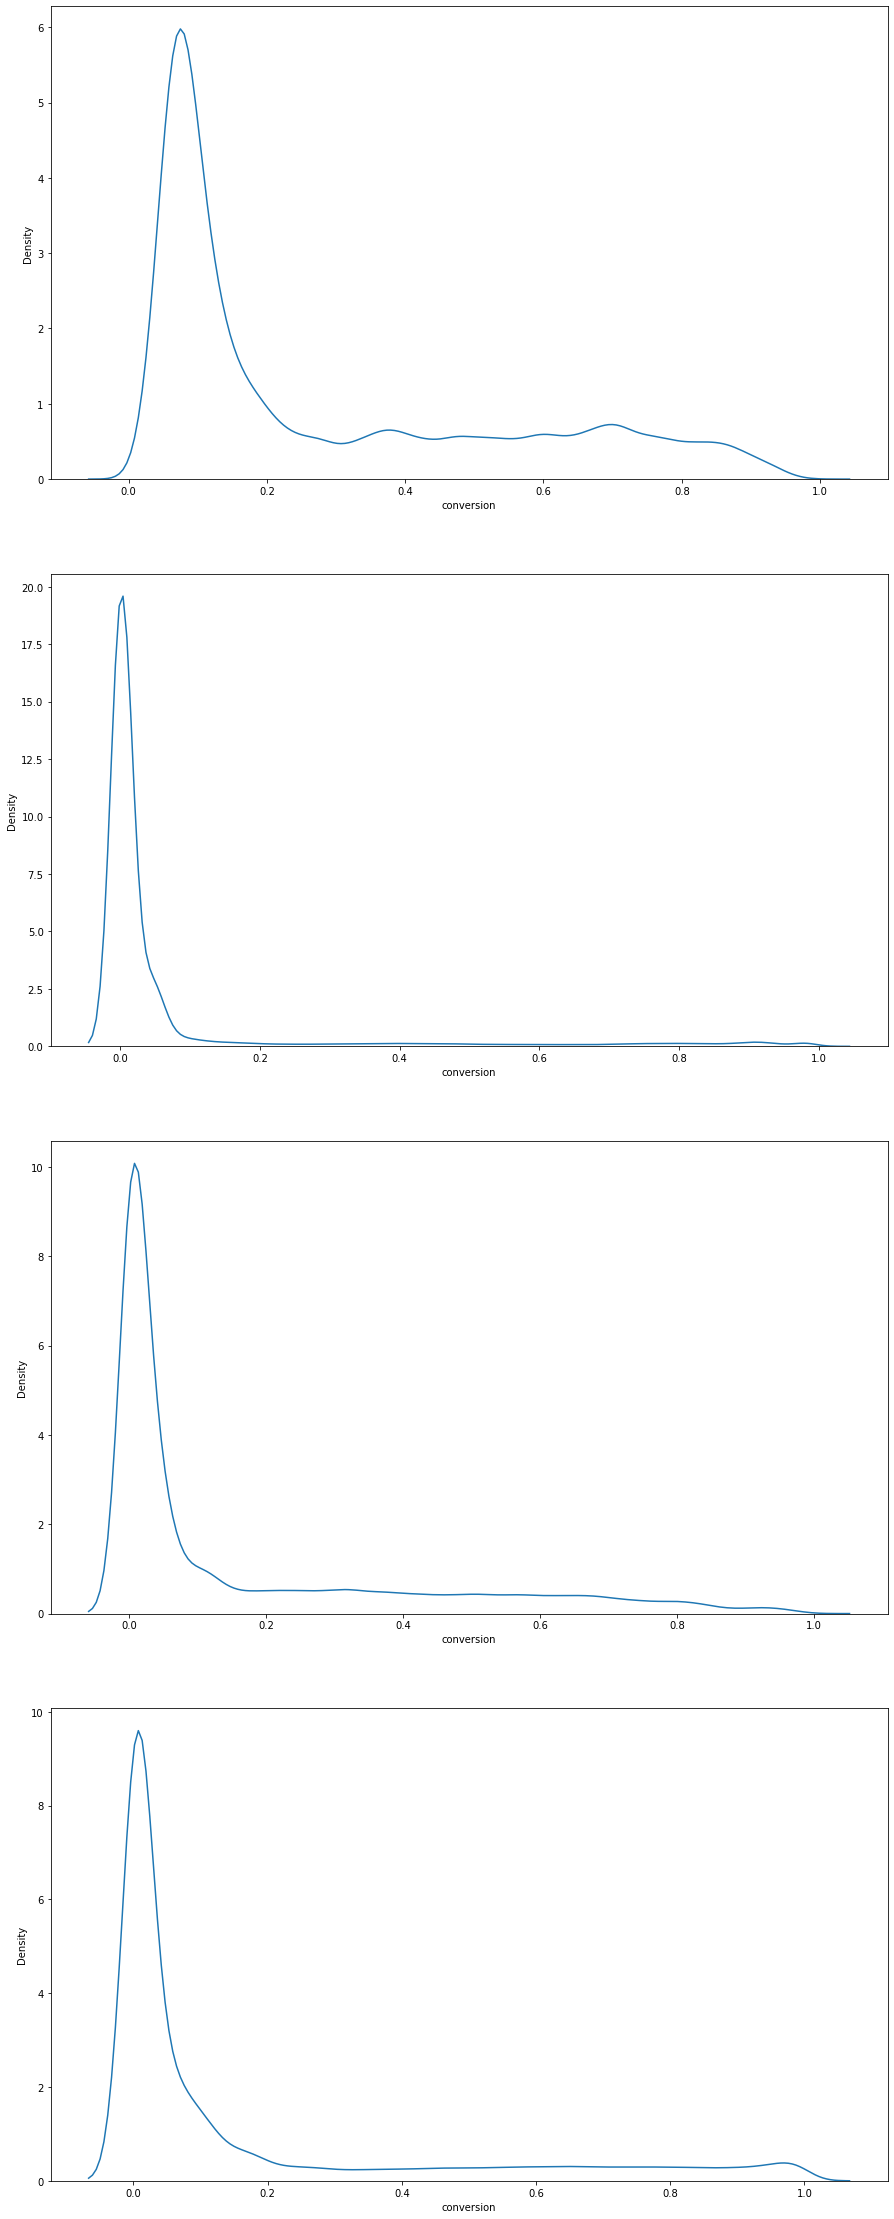

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharey=False, figsize=(15, 40))   
axs = [ax1, ax2, ax3, ax4]
for i, df in enumerate(lista_df_final):
  sns.kdeplot(data=df, x=df.columns[0], ax=axs[i])
plt.show()

In [ ]:
for df in lista_df_final:
  df.set_index('pk_cid', inplace=True)

In [ ]:
df_final_long_term

,conversion
pk_cid,
1394554,0.992173
1402266,0.991202
1435671,0.990910
1437622,0.990026
1422572,0.989757
...,...
1108045,0.000435
1098682,0.000435
1101074,0.000431


## exportar resultado

In [ ]:
df_final_pension_plan.to_excel('propension_pension_plan_grupo1.xlsx', sheet_name='pension_plan')

In [ ]:
df_final_short_term.to_excel('propension_short_term_grupo1.xlsx', sheet_name='short_term')

In [ ]:
df_final_long_term.to_excel('propension_long_term_grupo1.xlsx', sheet_name='long_term')

In [ ]:
df_final_fondo_inv.to_excel('propension_fondo_inv_grupo1.xlsx', sheet_name='fondo_inv')

# definir el potencial de cada producto

In [ ]:
df_sales_20_19 = pd.read_csv('/content/drive/MyDrive/T.I.C./Master Data Science/TFM/sales_20_19_NEW.csv', index_col = 0)

In [ ]:
# junta el df_sales_20_19 con el df_product_ID
df_sales_20_19 = df_sales_20_19.merge(df_product_ID, on='product_ID', how='left')

In [ ]:
df_sales_20_19

,pk_sale,cid,month_sale,product_ID,net_margin,product_desc,family_product
0,6666,33620,2018-05-01,2335,952.9,short_term_deposit,investment
1,6667,35063,2018-06-01,2335,1625.2,short_term_deposit,investment
2,6668,37299,2018-02-01,2335,1279.7,short_term_deposit,investment
3,6669,39997,2018-02-01,2335,1511.9,short_term_deposit,investment
4,6670,44012,2018-02-01,2335,1680.3,short_term_deposit,investment
...,...,...,...,...,...,...,...
240768,247434,1553456,2019-05-01,4657,56.7,em_acount,account
240769,247435,1553541,2019-05-01,4657,66.5,em_acount,account
240770,247436,1553559,2019-05-01,4657,73.0,em_acount,account
240771,247437,1553565,2019-05-01,4657,82.3,em_acount,account


In [ ]:
# filtra las ventas por producto
df_sales_plan_pension = df_sales_20_19[df_sales_20_19['product_desc']=='pension_plan']
df_sales_short_term = df_sales_20_19[df_sales_20_19['product_desc']=='short_term_deposit']
df_sales_long_term = df_sales_20_19[df_sales_20_19['product_desc']=='long_term_deposit']
df_sales_fondo_inv = df_sales_20_19[df_sales_20_19['product_desc']=='funds']

In [ ]:
# calcula el margen neto medio del producto
net_margin_medio_plan_pension = df_sales_plan_pension['net_margin'].sum()/df_sales_plan_pension['net_margin'].count()
net_margin_medio_short_term = df_sales_short_term['net_margin'].sum()/df_sales_short_term['net_margin'].count()
net_margin_medio_long_term = df_sales_long_term['net_margin'].sum()/df_sales_long_term['net_margin'].count()
net_margin_medio_fondo_inv = df_sales_fondo_inv['net_margin'].sum()/df_sales_fondo_inv['net_margin'].count()
# pone los net_margins en una lista
net_margins_medio = [net_margin_medio_plan_pension, net_margin_medio_short_term, net_margin_medio_long_term, net_margin_medio_fondo_inv]

In [ ]:
print("""margen neto medio:\n- plan de pensión: {}\n- short term: {}\n- long term: {}\n- fondo inv.: {}""".format(round(net_margin_medio_plan_pension, 0),
                                                                                                                  round(net_margin_medio_short_term, 0),
                                                                                                                  round(net_margin_medio_long_term, 0),
                                                                                                                  round(net_margin_medio_fondo_inv, 0)))

margen neto medio:
- plan de pensión: 5976.0
- short term: 1486.0
- long term: 1497.0
- fondo inv.: 1499.0


In [ ]:
# pone los roc_aucs en una lista
roc_aucs = [roc_auc_pension_plan, roc_auc_short_term, roc_auc_long_term, roc_auc_fondo_inv]

In [ ]:
# calcula el potencial de cada cliente para cada producto
for i, df in enumerate(lista_df_final):
  df['potencial'] = df['conversion'] * net_margins_medio[i] * roc_aucs[i]

In [ ]:
# calcula el potencial acumulado 
for df in lista_df_final:
  df['potencial_cumul'] = df['potencial'].cumsum()

In [ ]:
df_final_fondo_inv

,conversion,potencial,potencial_cumul
pk_cid,,,
1396113,1.000000,1332.005216,1.332005e+03
1371668,0.999966,1331.959676,2.663965e+03
1451218,0.999923,1331.902404,3.995867e+03
1446787,0.999918,1331.896772,5.327764e+03
1247603,0.999918,1331.896571,6.659661e+03
...,...,...,...
1059700,0.000458,0.610542,6.593866e+07
1064497,0.000456,0.607139,6.593866e+07
1054961,0.000453,0.603715,6.593866e+07


In [ ]:
# define el umbral que queremos para filtrar los clientes con una propensión de compra mayor
umbral = 0.9

In [ ]:
# crea una lista con los productos:
productos = ['plan de pensión', 'short_term', 'long_term', 'fondo inv.']

In [ ]:
# imprime la cantidad de clientes por encima del umbral 
print('número de clientes con una propensión de compra superior a {}%:'.format(int(umbral*100)))

# crea una lista con los número de clientes
num_potenciales = []

for i, df in enumerate(lista_df_final):
  df_top = df[df['conversion']>umbral]
  num_pot = len(df_top)
  print(productos[i]+':', num_pot)
  num_potenciales.append(num_pot)

número de clientes con una propensión de compra superior a 90%:
plan de pensión: 3226
short_term: 4132
long_term: 2747
fondo inv.: 11116


In [ ]:
# imprime el potencial de margen_neto de los clientes por encima del umbral
print('potencial de margen_neto para los clientes con una propensión de compra superior a {}%:'.format(int(umbral*100)))

# crea una lista con el potencial
potenciales = []

for i, df in enumerate(lista_df_final):
  df_top = df[df['conversion']>umbral]
  potencial = round(df_top['potencial'].sum()/1000000, 2)
  print(productos[i]+':', potencial, 'millones de €')
  potenciales.append(potencial)

potencial de margen_neto para los clientes con una propensión de compra superior a 90%:
plan de pensión: 14.41 millones de €
short_term: 5.54 millones de €
long_term: 3.38 millones de €
fondo inv.: 14.17 millones de €


In [ ]:
# creamos un dataframe con los potenciales y el número de clientes encima del umbral
df_potenciales = pd.DataFrame(productos, columns=['producto'])
df_potenciales['potencial en millones de €'] = potenciales
df_potenciales['número de clientes'] = num_potenciales

In [ ]:
df_potenciales

,producto,potencial en millones de €,número de clientes
0,plan de pensión,14.41,3226
1,short_term,5.54,4132
2,long_term,3.38,2747
3,fondo inv.,14.17,11116


In [ ]:
def add_value_labels_num(ax, spacing=5):
    """añade los valores del countplot
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va="bottom"

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va="top"

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha="center",                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [ ]:
def add_value_labels_pot(ax, spacing=5):
    """añade los valores del countplot
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va="bottom"

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va="top"

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha="center",                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

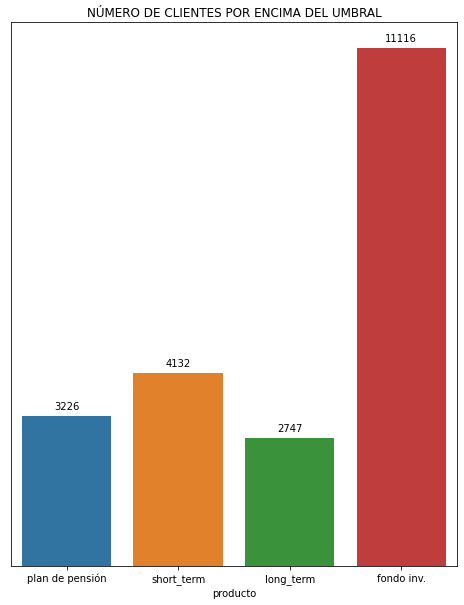

In [ ]:
# ploteamos el número de clientes por encima del umbral
plt.subplots(figsize=(8, 10))
ax = sns.barplot(data=df_potenciales, y='número de clientes', x='producto')
ax.set_title("NÚMERO DE CLIENTES POR ENCIMA DEL UMBRAL")

add_value_labels_num(ax)
ax.set(ylabel='')
ax.get_yaxis().set_visible(False)
plt.savefig('potencial_por_producto.jpg')
plt.show()

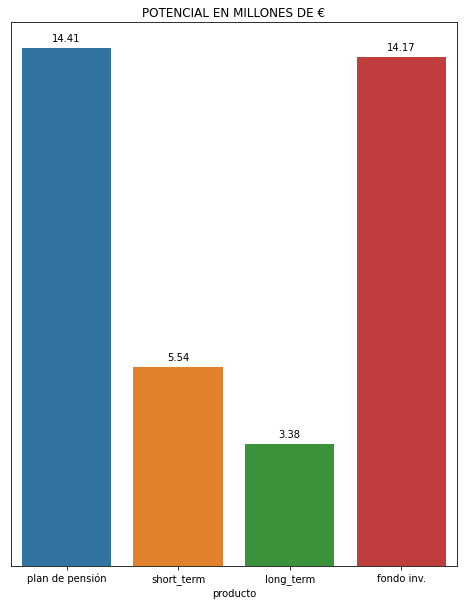

In [ ]:
# ploteamos los potenciales
plt.subplots(figsize=(8, 10))
ax = sns.barplot(data=df_potenciales, y='potencial en millones de €', x='producto')
ax.set_title("POTENCIAL EN MILLONES DE €")

add_value_labels_pot(ax)
ax.set(ylabel='')
ax.get_yaxis().set_visible(False)
plt.savefig('potencial_por_producto.jpg')
plt.show()